# Advanced Regression Assignment: Housing Data Analysis

# Business and Data Understanding
### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
### The company is looking at prospective properties to buy to enter the market. 

# Conditions for Understand/Predict

    - Which variables are significant in predicting the price of a house
    - How well those variables describe the price of a house
    - determine the optimal value of lambda for ridge and lasso regression.
    
# Result Expected
    - to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Data Understanding


In [1]:
# To remove any Warnings, adding the below libraries

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Basic libraries
import pandas as pd
import numpy as np
import os

In [3]:
#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# All Data modelling related libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics

In [5]:
#### Libraries for VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [6]:
# Metric Evaluation done and checked for Mean Squared Error
from sklearn.metrics import mean_squared_error

In [7]:
#Statistics
from scipy import stats
from scipy.stats import norm, skew 


In [8]:
#### Reading the data from the csv file
house_df = pd.read_csv("train.csv")
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
house_df.shape

(1460, 81)

There are total 1460 records and 81 columns of data present in the dataset.

In [10]:
### Checking for the field details and the non-null element count to check
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Many fields has the null values. lets see the percentage of missing values to have the clear understanding of the missing values

In [11]:
# Finding the percentage values of missing count and arranging in descending order for easier view
round_df = round(100*(house_df.isnull().sum()/len(house_df.index)), 2)
round_df.sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

In [12]:
house_df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [13]:
### Checking for the percentile value for viewing any outliers in data
house_df.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
5%       73.950000    20.000000    34.000000    3311.700000     4.000000   
10%     146.900000    20.000000    44.000000    5000.000000     5.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
100%   1460.000000   190.000000   313.000000  215245.000000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
5%        4.000000  1916.000000   1950.000000     0.000000     0.000000  ...   
10%       5.000000  1924.900000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
100%      9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
5%        0.000000     0.000000       0.000000     0.000000     0.000000   
10%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
100%    857.000000   547.000000     552.000000   508.000000   480.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
5%        0.000000      0.000000     2.000000  2006.000000   88000.000000  
10%       0.000000      0.000000     3.000000  2006.000000  106475.000000  
2

Few fields like LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, 3SsnPorch, ScreenPorch, PoolArea,MiscVal etc has the higher value jump from 95/99 % to 100%. Lets analyse this further in Data visualization

## Data Cleaning and Visualization

Before moving to the Data Visualization lets remove few columns which has more than 20% of missing records. Because if we impute, it is not going to provide proper results. So removing data which have more missing values.

In [14]:
house_df = house_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1)
house_df.shape

(1460, 76)

We dont need 'Id' column for our analysis, hence droping the column.

In [15]:
house_df = house_df.drop(['Id'], axis = 1)
house_df.shape

(1460, 75)

Since Sales Price is the Target Column, lets visualize the data for it. 

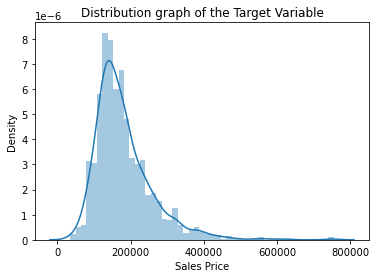

In [16]:
sns.distplot(house_df["SalePrice"])
plt.xlabel('Sales Price')
plt.title('Distribution graph of the Target Variable')
plt.show()

The target value is normally distributed but it is right skewed. We need to transform this variable to make it normally distributed so using log tranformation method

In [17]:
#The numpy function log to convert the sales price column value.
house_df["SalePrice"] = np.log(house_df["SalePrice"])

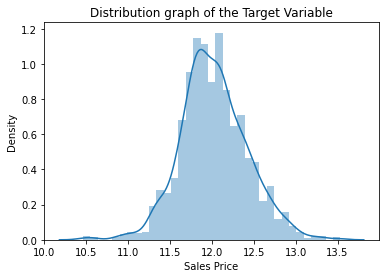

In [18]:
sns.distplot(house_df["SalePrice"])
plt.xlabel('Sales Price')
plt.title('Distribution graph of the Target Variable')
plt.show()

Now the value looks better. Hence keeping the column with log value itself.

#### Lets verify each field by field - Starting with the null values imputing

In [19]:
#### LotFrontage: Linear feet of street connected to property
house_df['LotFrontage'].isnull().sum()

259

In [20]:
house_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can see lot of values between 75% and max value, which means it has outliers. So considering to take median value for imputing

<AxesSubplot:xlabel='LotFrontage'>

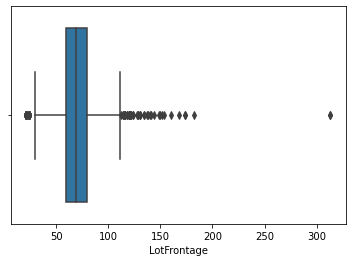

In [21]:
sns.boxplot(house_df['LotFrontage'])

In [22]:
# Imputing Null values with median
house_df['LotFrontage'] = house_df['LotFrontage'].fillna(house_df['LotFrontage'].median())

In [23]:
house_df['GarageCond'].isnull().sum()

81

In [24]:
house_df['GarageCond'].value_counts()*100/len(house_df)

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

In [25]:
house_df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Since already 90% of data is in favor of TA, lets make this value to NA

In [26]:
# Imputing Null values with mode since it is categorical value
house_df['GarageCond'] = house_df['GarageCond'].fillna('NA')

In [27]:
house_df['GarageCond'].value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [28]:
house_df['GarageType'].isnull().sum()

81

In [29]:
house_df['GarageType'].value_counts()*100/len(house_df)

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

The GarageType value is distributed, hence taking the high occurance value

In [30]:
# Imputing Null values with mode since it is categorical value
house_df['GarageType'] = house_df['GarageType'].fillna(house_df['GarageType'].mode()[0])

In [31]:
house_df['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [32]:
house_df['GarageYrBlt'].isnull().sum()

81

In [33]:
house_df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

<AxesSubplot:>

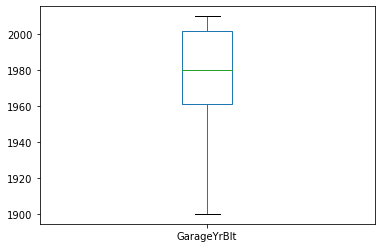

In [34]:
house_df['GarageYrBlt'].plot.box()

The GarageYrBlt field didnt had sudden jump in 75% and max value as well as the box plot shows clean data, no outliers, hence using mean to impute the data

In [35]:
# Imputing Null values with mean since it is showing clear data
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].mean())

In [36]:
house_df['GarageFinish'].isnull().sum()

81

In [37]:
house_df['GarageFinish'].value_counts()*100/len(house_df)

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

Since there is not much difference in value between the fields, taking NA value for the null values

In [38]:
house_df['GarageFinish']=house_df['GarageFinish'].fillna('NA')
house_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

In [39]:
house_df['GarageQual'].value_counts()*100/len(house_df)

TA    89.794521
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

Since GarageQual is skewed more towards a value, taking NA as value for the null values

In [40]:
house_df['GarageQual']=house_df['GarageQual'].fillna('NA')
house_df['GarageQual'].value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [41]:
house_df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [42]:
house_df['BsmtExposure']=house_df['BsmtExposure'].fillna('No')
house_df['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

As this field describes about the exposure or not, we can convert this field to 2 values containing exposure and No Exposure

In [43]:
# Converting the labels 2 into 1 as 1 represent HalfBath present

BsmtExp_value = {'BsmtExposure': {
    'Av':'Yes',
    'Gd': 'Yes',
    'Mn': 'Yes'
}} 

house_df['BsmtExposure'] = house_df.replace(BsmtExp_value)['BsmtExposure']
house_df['BsmtExposure'].value_counts()

No     991
Yes    469
Name: BsmtExposure, dtype: int64

In [44]:
house_df['BsmtFinType2']=house_df['BsmtFinType2'].fillna('NA')
house_df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [45]:
house_df['BsmtFinType1']=house_df['BsmtFinType1'].fillna('NA')
house_df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

The fields unf and NA means the same, its unfinished or no basement. so converting NA to unf

In [46]:
house_df['BsmtFinType1']=house_df['BsmtFinType1'].apply(lambda x: 'Unf' if x=='NA' else x)
house_df['BsmtFinType1'].value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

The features BsmtFinSF1, BsmtFinSF2 (Type1 and 2 Finished square feet) together and the unfinished square feet 'BsmtUnfSF' explains the TotalBsmtSF Total square feet of basement area so removing the BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF fields

In [47]:
house_df = house_df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)
house_df.shape

(1460, 72)

In [48]:
house_df['BsmtCond']=house_df['BsmtCond'].fillna('NA')
house_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [49]:
house_df['BsmtQual']=house_df['BsmtQual'].fillna('NA')
house_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

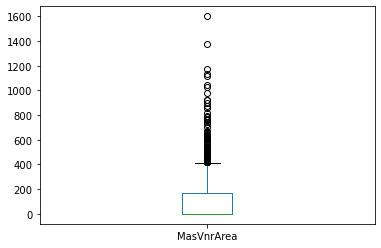

In [50]:
house_df['MasVnrArea'].plot.box()

Since there are many outliers, it is good to take the median value

In [51]:
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median())

In [52]:
house_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [53]:
house_df['MasVnrType'] = house_df['MasVnrType'].fillna('None')

In [54]:
house_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [55]:
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])

Now all the null values are imputed or removed. Lets check the null value once again

In [56]:
house_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 72, dtype: int64

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [57]:
house_df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

We need to convert all the numerical value to the category name.We need all the numbers to be mapped with the associated category provided. We will create dictionary for it followed by merging

In [58]:
MSSubClass_Dict = {'MSSubClass': {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}}

In [59]:
house_df['MSSubClass'] = house_df.replace(MSSubClass_Dict)['MSSubClass']

In [60]:
house_df['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

Now all the values are converted to category. The datatype has to be updated to the object

In [61]:
house_df['MSSubClass'].astype('object')

0                  2-STORY 1946 & NEWER
1       1-STORY 1946 & NEWER ALL STYLES
2                  2-STORY 1946 & NEWER
3                  2-STORY 1945 & OLDER
4                  2-STORY 1946 & NEWER
                     ...               
1455               2-STORY 1946 & NEWER
1456    1-STORY 1946 & NEWER ALL STYLES
1457               2-STORY 1945 & OLDER
1458    1-STORY 1946 & NEWER ALL STYLES
1459    1-STORY 1946 & NEWER ALL STYLES
Name: MSSubClass, Length: 1460, dtype: object

<AxesSubplot:>

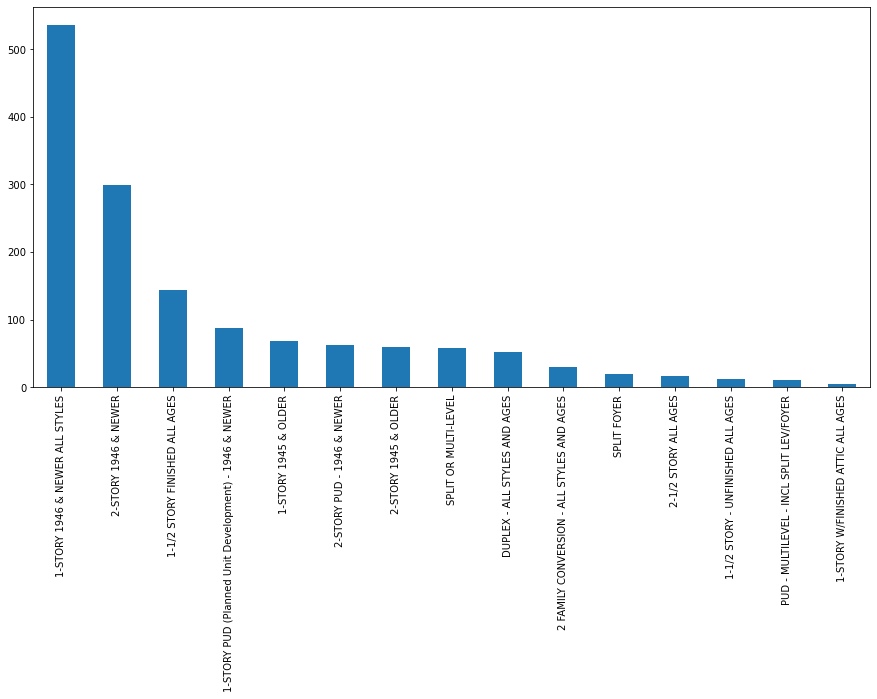

In [62]:
plt.figure(figsize=[15,7])
house_df['MSSubClass'].value_counts().plot.bar()


MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [63]:
house_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

We dont have the category as C (all), lets consider it as C itself. Leaving it as it is.

In [64]:
MSZoning_Dict = {'MSZoning': {
   'A': 'Agriculture',
   'C': 'Commercial',
   'FV': 'Floating Village Residential',
   'I': 'Industrial',
   'RH': 'Residential High Density',
   'RL': 'Residential Low Density',
   'RP': 'Residential Low Density Park',
   'RM': 'Residential Medium Density'
}}
house_df['MSZoning'] = house_df.replace(MSZoning_Dict)['MSZoning']

house_df['MSZoning'].value_counts()

Residential Low Density         1151
Residential Medium Density       218
Floating Village Residential      65
Residential High Density          16
C (all)                           10
Name: MSZoning, dtype: int64

In [65]:
house_df['MSZoning'].astype('object')


0       Residential Low Density
1       Residential Low Density
2       Residential Low Density
3       Residential Low Density
4       Residential Low Density
                 ...           
1455    Residential Low Density
1456    Residential Low Density
1457    Residential Low Density
1458    Residential Low Density
1459    Residential Low Density
Name: MSZoning, Length: 1460, dtype: object

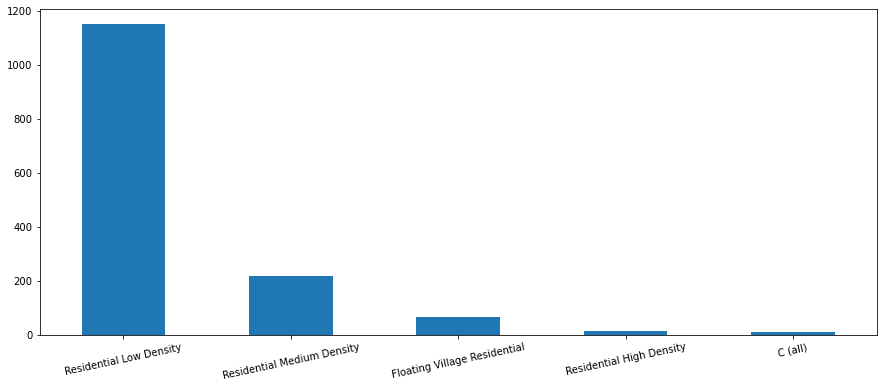

In [66]:
plt.figure(figsize=[15,6])
house_df['MSZoning'].value_counts().plot.bar()
plt.xticks(rotation=12)
plt.show()

In [67]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

##### Now Lets look into other values display

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

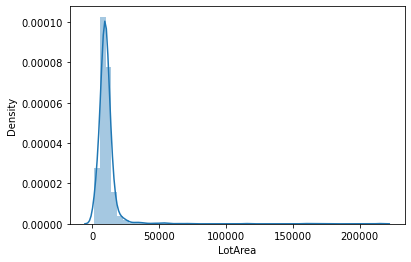

In [68]:
sns.distplot(house_df['LotArea'])

In [69]:
house_df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

We can drop the Street value, since most of the data is in pave and this attribute will not contribute to our analysis

In [70]:
house_df = house_df.drop(['Street'], axis=1)
house_df.shape

(1460, 71)

In [71]:
house_df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

We can drop the Utilities value, since most of the data is in AllPub and this attribute will not contribute to our analysis

In [72]:
house_df = house_df.drop(['Utilities'], axis=1)
house_df.shape

(1460, 70)

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [73]:
house_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

As per the description, we see that IR1, IR2, IR3 represent the field being irregular. We can group it into 1 single irregular as IR

In [74]:
# Converting the labels IR1, IR2, IR3 into IR as IR represent Irregularities present

Irregular_value = {'LotShape': {
    'IR1':'IR',
    'IR2':'IR',
    'IR3':'IR'
}} 

house_df['LotShape'] = house_df.replace(Irregular_value)['LotShape']

In [75]:
house_df['LotShape'].value_counts()

Reg    925
IR     535
Name: LotShape, dtype: int64

<AxesSubplot:>

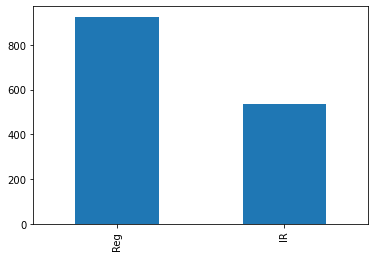

In [76]:
house_df['LotShape'].value_counts().plot.bar()

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [77]:
house_df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

As per the description, we see that Bnk, HLS, Low represent the field not being level either slope or rise. We can group it into 1 single NoLvl value 

In [78]:
# Converting the labels Bnk, HLS, Low into IR as NoLvl represent Not level land present

Level_value = {'LandContour': {
    'Bnk':'NoLvl',
    'HLS':'NoLvl',
    'Low':'NoLvl'
}} 

house_df['LandContour'] = house_df.replace(Level_value)['LandContour']

<AxesSubplot:>

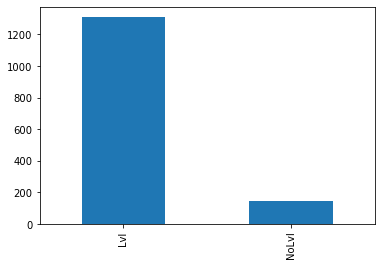

In [79]:
house_df['LandContour'].value_counts().plot.bar()

In [80]:
# We will change BsmtFullbath feature to either yes or No as we should be considering only its BsmtFullbath bath or not. 

house_df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [81]:
# Converting the labels 2, 3 into 1 as 1 represent BaseFullBath present

BsmtFullBath_value = {'BsmtFullBath': {
    2:1,
    3:1,
}} 

house_df['BsmtFullBath'] = house_df.replace(BsmtFullBath_value)['BsmtFullBath']

In [82]:
house_df['BsmtFullBath'].value_counts()

0    856
1    604
Name: BsmtFullBath, dtype: int64

In [83]:
# We will change HalfBath feature to either yes or No as we should be considering only its HalfBath bath or not. 

house_df['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [84]:
# Converting the labels 2 into 1 as 1 represent HalfBath present

HalfBath_value = {'HalfBath': {
    2:1
}} 

house_df['HalfBath'] = house_df.replace(HalfBath_value)['HalfBath']

In [85]:
house_df['HalfBath'].value_counts()

0    913
1    547
Name: HalfBath, dtype: int64

In [86]:
house_df['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

Since the Month details are in numbers, converting it to the month values

In [87]:
Month_Value = {'MoSold': {
    1 : 'Jan',
    2 :	'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}} 

house_df['MoSold'] = house_df.replace(Month_Value)['MoSold']

house_df['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

In [88]:
house_df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [89]:
# Converting the labels FR3, FR2 into FR as FR represent Frontage of the lot present

Frontage_value = {'LotConfig': {
    'FR2':'FR',
    'FR3': 'FR'
}} 

house_df['LotConfig'] = house_df.replace(Frontage_value)['LotConfig']

In [90]:
house_df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR           51
Name: LotConfig, dtype: int64

<AxesSubplot:>

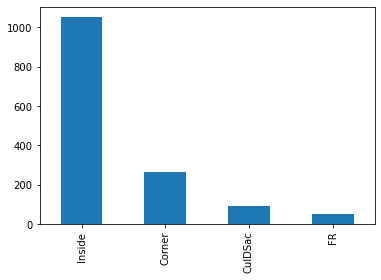

In [91]:
house_df['LotConfig'].value_counts().plot.bar()

In [92]:
house_df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [93]:
house_df['LandSlope'].value_counts()*100/len(house_df)

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

since 94% of the value lies in the same value, lets remove this

In [94]:
house_df = house_df.drop(['LandSlope'], axis = 1)
house_df.shape

(1460, 69)

In [95]:
house_df['Condition1'].value_counts()*100/len(house_df)

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64

In [96]:
house_df['Condition2'].value_counts()*100/len(house_df)

Norm      98.972603
Feedr      0.410959
PosN       0.136986
RRNn       0.136986
Artery     0.136986
RRAn       0.068493
PosA       0.068493
RRAe       0.068493
Name: Condition2, dtype: float64

Almost 86% and 98% for the Condition1 and Condition2 are under normal there is not much data for other classifications. so deleting these 2 fields

In [97]:
house_df = house_df.drop(['Condition1','Condition2'], axis = 1)
house_df.shape

(1460, 67)

In [98]:
house_df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

The features for year are 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold'. 
- As we observe the data, it is noted that most of The values in the 'GarageYrBlt' are either ('YearBuilt', 'YearRemodAdd') values or inbetween values. 
    - We can delete the 'GarageYrBlt' field
- When the Structure is remodelled, it means it is renewed again asif new house. so 'YearBuilt' can be removed.
- Instead of having 2 features to explain about the house old, we can derive it and bring to 1 field from 'YearRemodAdd' and 'YrSold'

In [99]:
house_df['HouseAge'] = house_df['YrSold']-house_df['YearRemodAdd']

In [100]:
house_df = house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 1)
house_df.shape

(1460, 64)

In [101]:
house_df['RoofMatl'].value_counts()*100/len(house_df)

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Membran     0.068493
Roll        0.068493
Metal       0.068493
ClyTile     0.068493
Name: RoofMatl, dtype: float64

Since 98% of the value lies in the 'CompShg' field, this feature is not going to help in analysis, so dropping this field

In [102]:
house_df = house_df.drop(['RoofMatl'], axis = 1)
house_df.shape

(1460, 63)

In [103]:
# Exterior1st and Exterior2nd can be conidered as a single entity by its defination

house_df[['Exterior1st','Exterior2nd']].value_counts()*100/len(house_df)

Exterior1st  Exterior2nd
VinylSd      VinylSd        34.383562
MetalSd      MetalSd        14.520548
HdBoard      HdBoard        13.219178
Wd Sdng      Wd Sdng        12.123288
Plywood      Plywood         6.575342
                              ...    
HdBoard      Wd Sdng         0.068493
VinylSd      AsbShng         0.068493
HdBoard      MetalSd         0.068493
VinylSd      HdBoard         0.068493
Wd Sdng      MetalSd         0.068493
Length: 67, dtype: float64

As we can see the 'Exterior2nd' feature value is almost 88% matching with the 'Exterior1st' value, we can remove either one of the value. Both the feature has most of the fields explaining the same details. so removing one.

In [104]:
house_df = house_df.drop(['Exterior2nd'], axis = 1)
house_df.shape

(1460, 62)

In [105]:
house_df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [106]:
house_df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [107]:
# ExterQual
house_df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [108]:
house_df['Heating'].value_counts()*100/len(house_df)

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

More than 97% of the data belongs to 'GasA' of Heating. Hence it is not good candidate for analysis

In [109]:
house_df = house_df.drop(['Heating'],axis=1)
house_df.shape

(1460, 61)

In [110]:
house_df['LowQualFinSF'].value_counts()*100/len(house_df)

0      98.219178
80      0.205479
360     0.136986
528     0.068493
53      0.068493
120     0.068493
144     0.068493
156     0.068493
205     0.068493
232     0.068493
234     0.068493
371     0.068493
572     0.068493
390     0.068493
392     0.068493
397     0.068493
420     0.068493
473     0.068493
479     0.068493
481     0.068493
513     0.068493
514     0.068493
515     0.068493
384     0.068493
Name: LowQualFinSF, dtype: float64

Low quality finished square feet (all floors) 'LowQualFinSF' is 0 for 98% of the values. This field is not a good candidate for analysis. Hence removing the same.

In [111]:
house_df = house_df.drop(['LowQualFinSF'],axis=1)
house_df.shape

(1460, 60)

In [112]:
house_df['Functional'].value_counts()*100/len(house_df)

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64

93% of record belongs to a single class, hence removing the feature 'Functional'

In [113]:
house_df = house_df.drop(['Functional'],axis=1)
house_df.shape

(1460, 59)

The feature 'GarageCars' explains indirectly the value of the 'GarageArea'. It can be considered that the 'GarageCars' are more explaining in number of cars that can be parked than Garage Area. Hence removing the Garage Area.

In [114]:
house_df = house_df.drop(['GarageArea'],axis=1)
house_df.shape

(1460, 58)

In [115]:
house_df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [116]:
house_df['PavedDrive'].value_counts()*100/len(house_df)

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64

since there are more than 90% records pointing to Y, removing this field

In [117]:
house_df = house_df.drop(['PavedDrive'],axis=1)
house_df.shape

(1460, 57)

In [118]:
house_df['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

Since the number of 0 values are more, this field can be dropped from our analysis list of features

In [119]:
house_df = house_df.drop(['3SsnPorch'],axis=1)
house_df.shape

(1460, 56)

In [120]:
house_df['ScreenPorch'].value_counts()*100/len(house_df)

0      92.054795
192     0.410959
224     0.342466
120     0.342466
189     0.273973
         ...    
182     0.068493
440     0.068493
178     0.068493
312     0.068493
480     0.068493
Name: ScreenPorch, Length: 76, dtype: float64

Again for this feature as well more number of values are 0. Hence removing this from our feature list for analysis.

In [121]:
house_df = house_df.drop(['ScreenPorch'],axis=1)
house_df.shape

(1460, 55)

In [122]:
house_df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [123]:
house_df['BsmtCond'].value_counts()*100/len(house_df)

TA    89.794521
Gd     4.452055
Fa     3.082192
NA     2.534247
Po     0.136986
Name: BsmtCond, dtype: float64

since 89% of the data is into 1 category, removing this field

In [124]:
house_df = house_df.drop(['BsmtCond'],axis=1)
house_df.shape

(1460, 54)

In [125]:
house_df['CentralAir'].value_counts()*100/len(house_df)

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

since 93% of the values is into 'Y' categorry, removing this field

In [126]:
house_df = house_df.drop(['CentralAir'],axis=1)
house_df.shape

(1460, 53)

In [127]:
house_df['Electrical'].value_counts()*100/len(house_df)

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

since 91% of the record lies in 1 category, removing this field from analysis

In [128]:
house_df = house_df.drop(['Electrical'],axis=1)
house_df.shape

(1460, 52)

In [129]:
house_df['BsmtHalfBath'].value_counts()*100/len(house_df)

0    94.383562
1     5.479452
2     0.136986
Name: BsmtHalfBath, dtype: float64

BsmtHalfBath field has 94% into 1 categorical value. Hence removing this field

In [130]:
house_df = house_df.drop(['BsmtHalfBath'],axis=1)
house_df.shape

(1460, 51)

In [131]:
house_df['KitchenAbvGr'].value_counts()*100/len(house_df)

1    95.342466
2     4.452055
3     0.136986
0     0.068493
Name: KitchenAbvGr, dtype: float64

since 95% of the categorical value is part of 1 category, removing this feature from analysis

In [132]:
house_df = house_df.drop(['KitchenAbvGr'],axis=1)
house_df.shape

(1460, 50)

In [133]:
house_df['GarageQual'].value_counts()*100/len(house_df)

TA    89.794521
NA     5.547945
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

since 89% of the record lies in TA category, removing this feature from analysis

In [134]:
house_df = house_df.drop(['GarageQual'],axis=1)
house_df.shape

(1460, 49)

In [135]:
house_df['GarageCond'].value_counts()*100/len(house_df)

TA    90.821918
NA     5.547945
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

since 90% of the record lies in TA category, removiing this feature from analysis

In [136]:
house_df = house_df.drop(['GarageCond'],axis=1)
house_df.shape

(1460, 48)

In [137]:
house_df['PoolArea'].value_counts()*100/len(house_df)

0      99.520548
738     0.068493
648     0.068493
576     0.068493
555     0.068493
519     0.068493
512     0.068493
480     0.068493
Name: PoolArea, dtype: float64

since 99% of the record is 0, this feature will not have any help for the analysis. Hence removing the feature from the analysis

In [138]:
house_df = house_df.drop(['PoolArea'],axis=1)
house_df.shape

(1460, 47)

In [139]:
house_df['MiscVal'].value_counts()*100/len(house_df)

0        96.438356
400       0.753425
500       0.547945
700       0.342466
450       0.273973
2000      0.273973
600       0.273973
1200      0.136986
480       0.136986
1150      0.068493
800       0.068493
15500     0.068493
620       0.068493
3500      0.068493
560       0.068493
2500      0.068493
1300      0.068493
1400      0.068493
350       0.068493
8300      0.068493
54        0.068493
Name: MiscVal, dtype: float64

since 96% of the record is pointed to a category, removing the field from analysis.

In [140]:
house_df = house_df.drop(['MiscVal'],axis=1)
house_df.shape

(1460, 46)

In [141]:
house_df['SaleType'].value_counts()*100/len(house_df)

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLw     0.342466
ConLI     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64

since 86% of the data lies in the same category of the feature, we are removing this field

In [142]:
house_df = house_df.drop(['SaleType'],axis=1)
house_df.shape

(1460, 45)

In [143]:
house_df['SaleCondition'].value_counts()*100/len(house_df)

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64

We have analysed most of the feature, the Features which didnt have anything to change are not added here for saving some space for each value_counts()

In [144]:
house_df.shape

(1460, 45)

In [145]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

## Data Visualization

<Figure size 2160x2160 with 0 Axes>

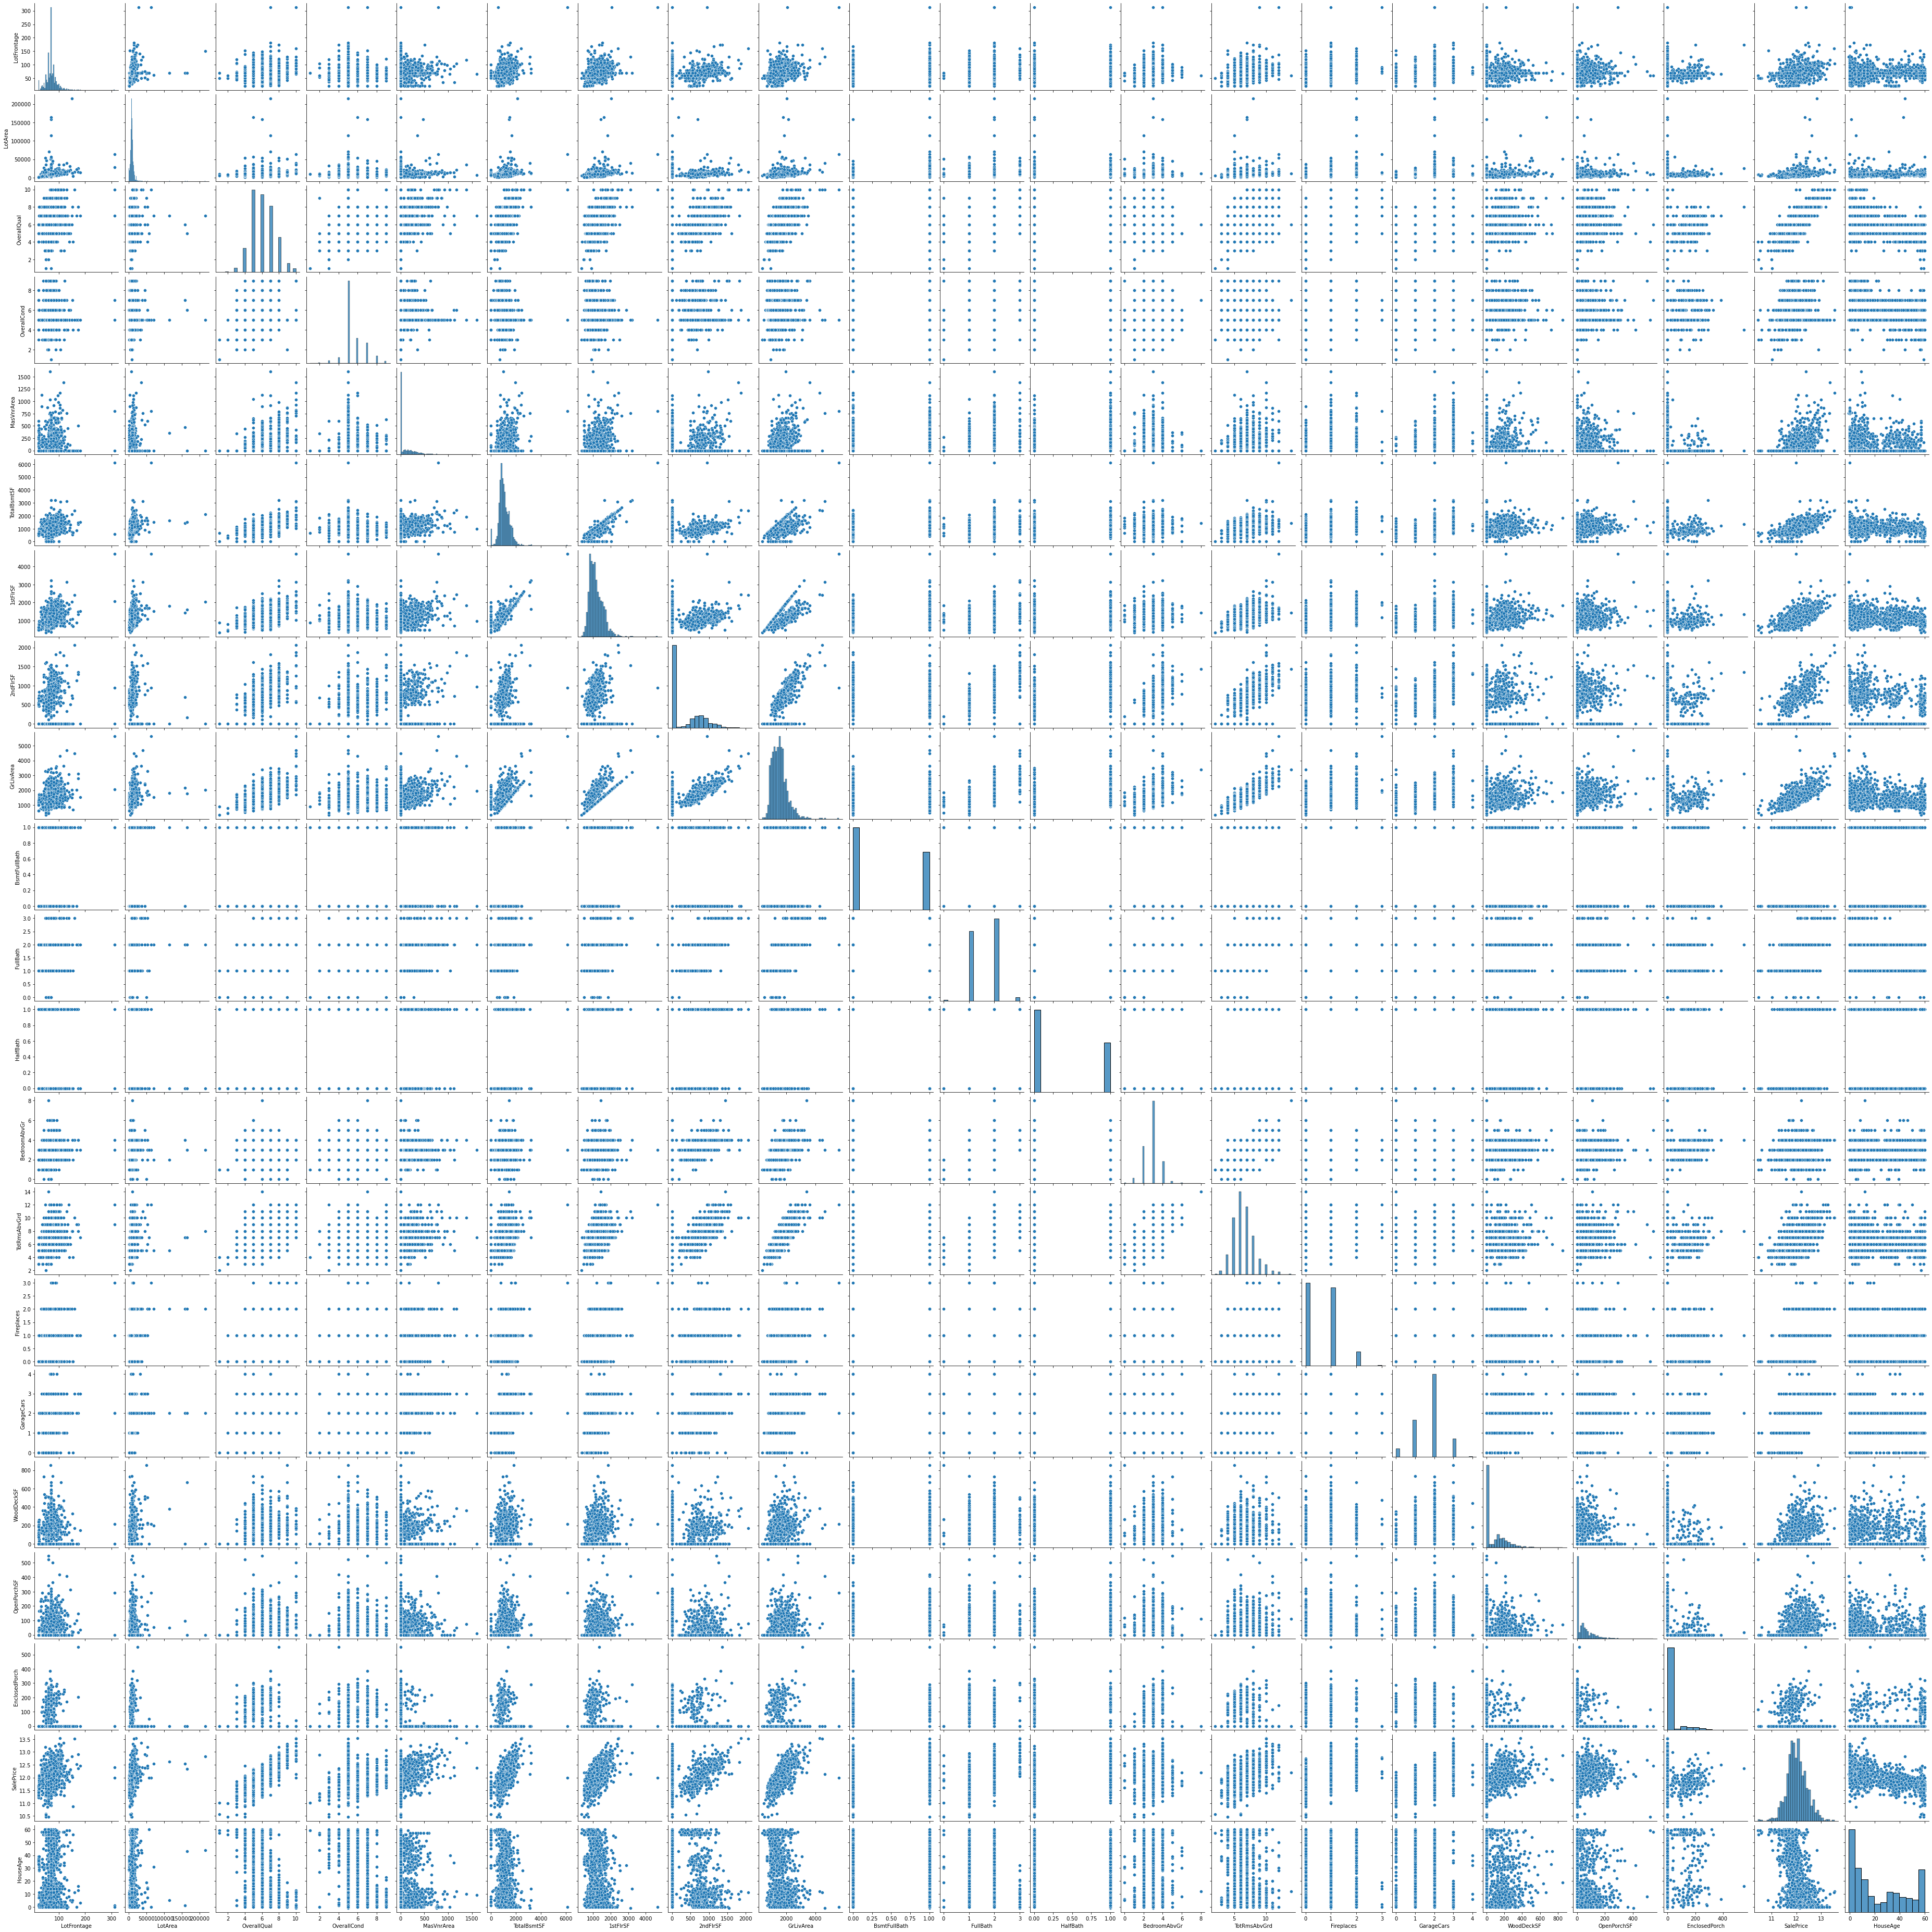

In [146]:
plt.figure(figsize=[30,30])
sns.pairplot(house_df)

In [147]:
# correlation matrix
cor_Value = house_df.corr()
cor_Value

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage       1.000000  0.304522     0.234812    -0.053281    0.178469   
LotArea           0.304522  1.000000     0.105806    -0.005636    0.103321   
OverallQual       0.234812  0.105806     1.000000    -0.091932    0.407252   
OverallCond      -0.053281 -0.005636    -0.091932     1.000000   -0.125694   
MasVnrArea        0.178469  0.103321     0.407252    -0.125694    1.000000   
TotalBsmtSF       0.363472  0.260833     0.537808    -0.171098    0.360067   
1stFlrSF          0.413773  0.299475     0.476224    -0.144203    0.339850   
2ndFlrSF          0.072388  0.050986     0.295493     0.028942    0.173800   
GrLivArea         0.368007  0.263116     0.593007    -0.079686    0.388052   
BsmtFullBath      0.077452  0.100020     0.118715    -0.051892    0.091143   
FullBath          0.180534  0.126031     0.550600    -0.194149    0.272999   
HalfBath          0.047204  0.014419     0.291372    -0.058148    0.202001   
BedroomAbvGr      0.236840  0.119690     0.101676     0.012980    0.102775   
TotRmsAbvGrd      0.320518  0.190015     0.427452    -0.057583    0.279568   
Fireplaces        0.233221  0.271364     0.396765    -0.023820    0.247015   
GarageCars        0.269539  0.154871     0.600671    -0.185758    0.361945   
WoodDeckSF        0.075542  0.171698     0.238923    -0.003334    0.159991   
OpenPorchSF       0.137014  0.084774     0.308819    -0.032589    0.122528   
EnclosedPorch     0.010287 -0.018340    -0.113937     0.070356   -0.109907   
SalePrice         0.335292  0.257320     0.817184    -0.036868    0.426775   
HouseAge         -0.082957 -0.014709    -0.552570    -0.070931   -0.177105   

               TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  \
LotFrontage       0.363472  0.413773  0.072388   0.368007      0.077452  ...   
LotArea           0.260833  0.299475  0.050986   0.263116      0.100020  ...   
OverallQual       0.537808  0.476224  0.295493   0.593007      0.118715  ...   
OverallCond      -0.171098 -0.144203  0.028942  -0.079686     -0.051892  ...   
MasVnrArea        0.360067  0.339850  0.173800   0.388052      0.091143  ...   
TotalBsmtSF       1.000000  0.819530 -0.174512   0.454868      0.289010  ...   
1stFlrSF          0.819530  1.000000 -0.202646   0.566024      0.229843  ...   
2ndFlrSF         -0.174512 -0.202646  1.000000   0.687501     -0.168459  ...   
GrLivArea         0.454868  0.566024  0.687501   1.000000      0.024818  ...   
BsmtFullBath      0.289010  0.229843 -0.168459   0.024818      1.000000  ...   
FullBath          0.323722  0.380637  0.421378   0.630012     -0.058842  ...   
HalfBath         -0.050299 -0.123469  0.618433   0.420498     -0.046814  ...   
BedroomAbvGr      0.050450  0.127401  0.502901   0.521270     -0.136991  ...   
TotRmsAbvGrd      0.285573  0.409516  0.616423   0.825489     -0.057138  ...   
Fireplaces        0.339519  0.410531  0.194561   0.461679      0.133236  ...   
GarageCars        0.434585  0.439317  0.183926   0.467247      0.142707  ...   
WoodDeckSF        0.232019  0.235459  0.092165   0.247433      0.166964  ...   
OpenPorchSF       0.247264  0.211671  0.208026   0.330224      0.069107  ...   
EnclosedPorch    -0.095478 -0.065292  0.061989   0.009113     -0.044074  ...   
SalePrice         0.612134  0.596981  0.319300   0.700927      0.239220  ...   
HouseAge         -0.292096 -0.241310 -0.141903  -0.289805     -0.120568  ...   

               HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
LotFrontage    0.047204      0.236840      0.320518    0.233221    0.269539   
LotArea        0.014419      0.119690      0.190015    0.271364    0.154871   
OverallQual    0.291372      0.101676      0.427452    0.396765    0.600671   
OverallCond   -0.058148      0.012980     -0.057583   -0.023820   -0.185758   
MasVnrArea     0.202001      0.102775      0.279568    0.247015    0.361945   
TotalBsmtSF   -0.050299      0.050450      0.285573    0.339519

Its difficult to see, so lets print the correlation result to have better view

In [148]:
print(cor_Value)

               LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage       1.000000  0.304522     0.234812    -0.053281    0.178469   
LotArea           0.304522  1.000000     0.105806    -0.005636    0.103321   
OverallQual       0.234812  0.105806     1.000000    -0.091932    0.407252   
OverallCond      -0.053281 -0.005636    -0.091932     1.000000   -0.125694   
MasVnrArea        0.178469  0.103321     0.407252    -0.125694    1.000000   
TotalBsmtSF       0.363472  0.260833     0.537808    -0.171098    0.360067   
1stFlrSF          0.413773  0.299475     0.476224    -0.144203    0.339850   
2ndFlrSF          0.072388  0.050986     0.295493     0.028942    0.173800   
GrLivArea         0.368007  0.263116     0.593007    -0.079686    0.388052   
BsmtFullBath      0.077452  0.100020     0.118715    -0.051892    0.091143   
FullBath          0.180534  0.126031     0.550600    -0.194149    0.272999   
HalfBath          0.047204  0.014419     0.291372    -0.058148  

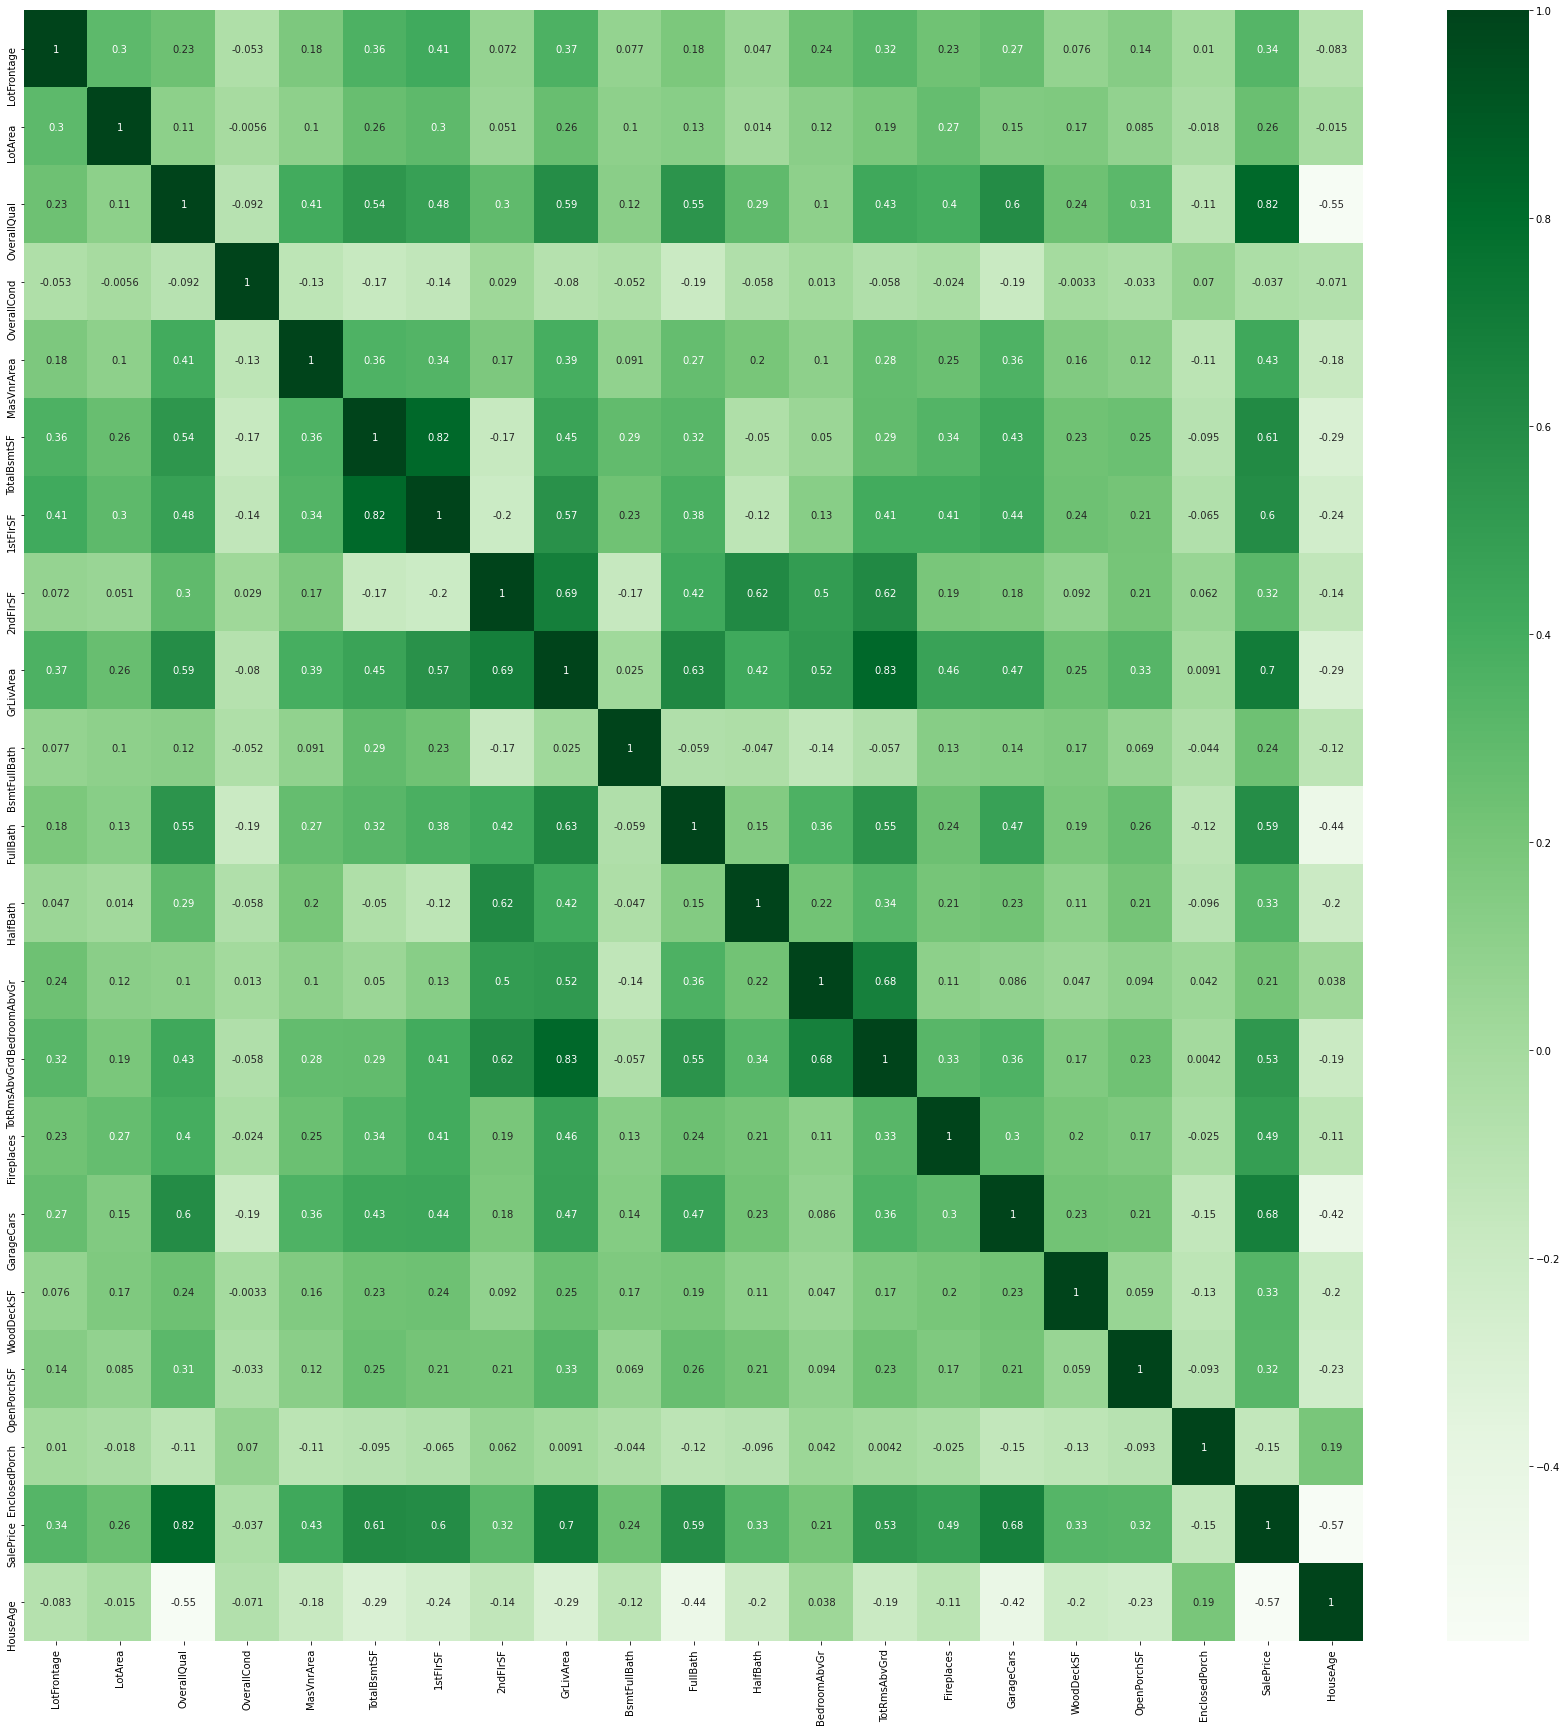

In [149]:
# Viewing the correlation in heatmap
plt.figure(figsize=[30,30])
sns.heatmap(cor_Value, cmap="Greens", annot=True)
plt.show()

Based on the Heat map and the correlation value for the numerical value, we can understand few correlation values.
- OverallQual 0.817184
- GrLivArea 0.700927
- GarageCars 0.680625
- HouseAge -0.568136

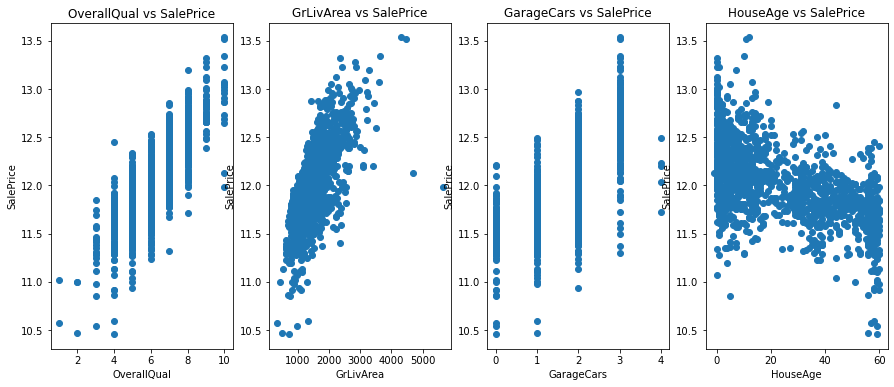

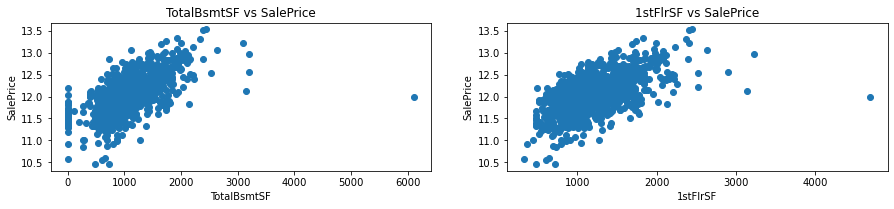

In [150]:
plt.figure(figsize=[15,6])
plt.subplot(1,4,1)
plt.scatter(house_df.OverallQual, house_df.SalePrice)

plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

plt.subplot(1,4,2)
plt.scatter(house_df.GrLivArea, house_df.SalePrice)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(1,4,3)
plt.scatter(house_df.GarageCars, house_df.SalePrice)
plt.title('GarageCars vs SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')

plt.subplot(1,4,4)
plt.scatter(house_df.HouseAge, house_df.SalePrice)
plt.title('HouseAge vs SalePrice')
plt.xlabel('HouseAge')
plt.ylabel('SalePrice')
plt.show()
plt.figure(figsize=[15,6])
plt.subplot(2,2,1)
plt.scatter(house_df.TotalBsmtSF, house_df.SalePrice)
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(2,2,2)
plt.scatter(house_df['1stFlrSF'], house_df.SalePrice)
plt.title('1stFlrSF vs SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

We can see some trend in the data from these fields analysis

In [151]:
numerical_value  = house_df.select_dtypes(include=['float64', 'int64'])
numerical_value 

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  TotalBsmtSF  \
0            65.0     8450            7            5       196.0          856   
1            80.0     9600            6            8         0.0         1262   
2            68.0    11250            7            5       162.0          920   
3            60.0     9550            7            5         0.0          756   
4            84.0    14260            8            5       350.0         1145   
...           ...      ...          ...          ...         ...          ...   
1455         62.0     7917            6            5         0.0          953   
1456         85.0    13175            6            6       119.0         1542   
1457         66.0     9042            7            9         0.0         1152   
1458         68.0     9717            5            6         0.0         1078   
1459         75.0     9937            5            6         0.0         1256   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  HalfBath  \
0          856       854       1710             1  ...         1   
1         1262         0       1262             0  ...         0   
2          920       866       1786             1  ...         1   
3          961       756       1717             1  ...         0   
4         1145      1053       2198             1  ...         1   
...        ...       ...        ...           ...  ...       ...   
1455       953       694       1647             0  ...         1   
1456      2073         0       2073             1  ...         0   
1457      1188      1152       2340             0  ...         0   
1458      1078         0       1078             1  ...         0   
1459      1256         0       1256             1  ...         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  WoodDeckSF  \
0                3             8           0           2           0   
1                3             6           1           2         298   
2                3             6           1           2           0   
3                3             7           1           3           0   
4                4             9           1           3         192   
...            ...           ...         ...         ...         ...   
1455             3             7           1           2           0   
1456             3             7           2           2         349   
1457             4             9           2           1           0   
1458             2             5           0           1         366   
1459             3             6           0           1         736   

      OpenPorchSF  EnclosedPorch  SalePrice  HouseAge  
0              61              0  12.247694         5  
1               0              0  12.109011        31  
2              42              0  12.317167         6  
3              35            272  11.849398        36  
4              84              0  12.429216         8  
...           ...            ...        ...       ...  
1455           40              0  12.072541         7  
1456            0              0  12.254863        22  
1457           60              0  12.493130         4  
1458            0            112  11.864462        14  
1459           68              0  11.901583        43  

[1460 rows x 21 columns]

In [152]:
categorical_value  = house_df.select_dtypes(include=['object'])
categorical_value 

MSSubClass                 MSZoning LotShape  \
0                2-STORY 1946 & NEWER  Residential Low Density      Reg   
1     1-STORY 1946 & NEWER ALL STYLES  Residential Low Density      Reg   
2                2-STORY 1946 & NEWER  Residential Low Density       IR   
3                2-STORY 1945 & OLDER  Residential Low Density       IR   
4                2-STORY 1946 & NEWER  Residential Low Density       IR   
...                               ...                      ...      ...   
1455             2-STORY 1946 & NEWER  Residential Low Density      Reg   
1456  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density      Reg   
1457             2-STORY 1945 & OLDER  Residential Low Density      Reg   
1458  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density      Reg   
1459  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density      Reg   

     LandContour LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
0            Lvl    Inside      CollgCr     1Fam     2Story     Gable   
1            Lvl        FR      Veenker     1Fam     1Story     Gable   
2            Lvl    Inside      CollgCr     1Fam     2Story     Gable   
3            Lvl    Corner      Crawfor     1Fam     2Story     Gable   
4            Lvl        FR      NoRidge     1Fam     2Story     Gable   
...          ...       ...          ...      ...        ...       ...   
1455         Lvl    Inside      Gilbert     1Fam     2Story     Gable   
1456         Lvl    Inside       NWAmes     1Fam     1Story     Gable   
1457         Lvl    Inside      Crawfor     1Fam     2Story     Gable   
1458         Lvl    Inside        NAmes     1Fam     1Story       Hip   
1459         Lvl    Inside      Edwards     1Fam     1Story     Gable   

     Exterior1st  ... BsmtQual BsmtExposure BsmtFinType1 BsmtFinType2  \
0        VinylSd  ...       Gd           No          GLQ          Unf   
1        MetalSd  ...       Gd          Yes          ALQ          Unf   
2        VinylSd  ...       Gd          Yes          GLQ          Unf   
3        Wd Sdng  ...       TA           No          ALQ          Unf   
4        VinylSd  ...       Gd          Yes          GLQ          Unf   
...          ...  ...      ...          ...          ...          ...   
1455     VinylSd  ...       Gd           No          Unf          Unf   
1456     Plywood  ...       Gd           No          ALQ          Rec   
1457     CemntBd  ...       TA           No          GLQ          Unf   
1458     MetalSd  ...       TA          Yes          GLQ          Rec   
1459     HdBoard  ...       TA           No          BLQ          LwQ   

     HeatingQC KitchenQual GarageType GarageFinish MoSold SaleCondition  
0           Ex          Gd     Attchd          RFn    Feb        Normal  
1           Ex          TA     Attchd          RFn    May        Normal  
2           Ex          Gd     Attchd          RFn    Sep        Normal  
3           Gd          Gd     Detchd          Unf    Feb       Abnorml  
4           Ex          Gd     Attchd          RFn    Dec        Normal  
...        ...         ...        ...          ...    ...           ...  
1455        Ex          TA     Attchd          RFn    Aug        Normal  
1456        TA          TA     Attchd          Unf    Feb        Normal  
1457        Ex          Gd     Attchd          RFn    May        Normal  
1458        Gd          Gd     Attchd          Unf    Apr        Normal  
1459        Gd          TA     Attchd          Fin    Jun        Normal  

[1460 rows x 24 columns]

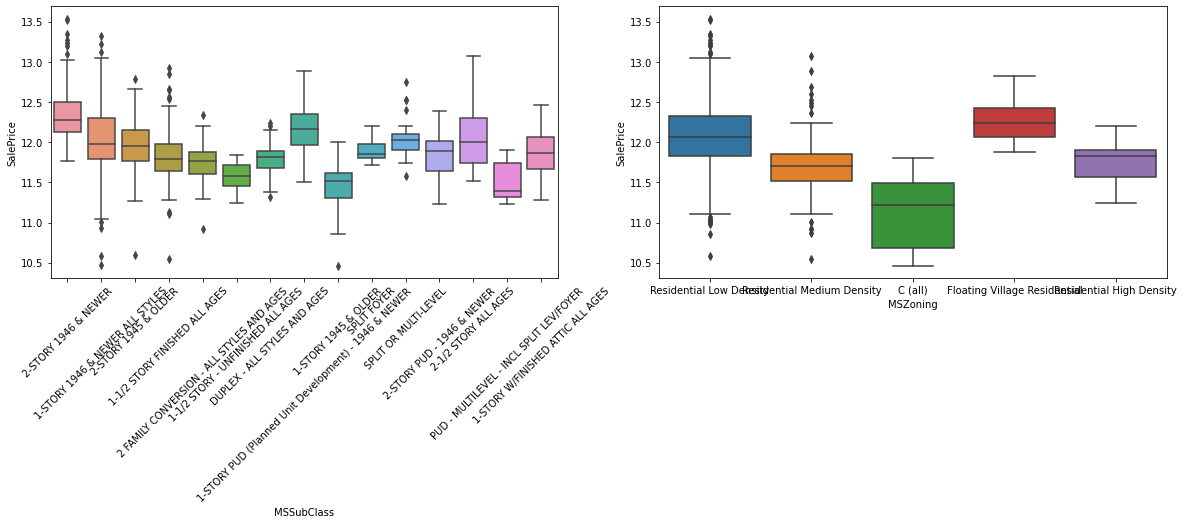

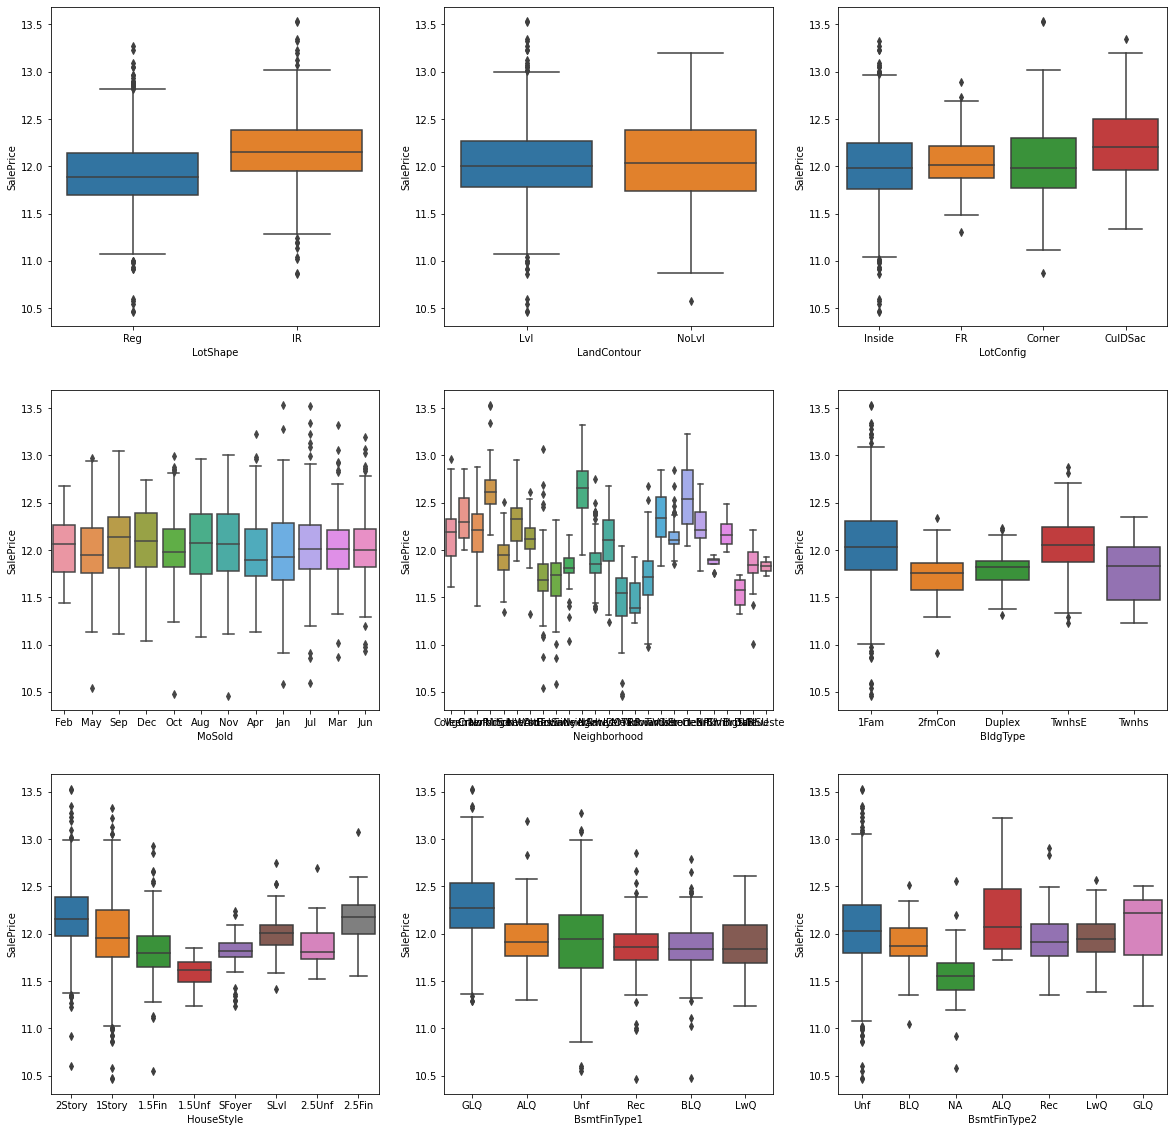

In [153]:
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(data=house_df, x='MSSubClass', y="SalePrice")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=house_df, x='MSZoning', y="SalePrice")
plt.show()
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(data=house_df, x='LotShape', y="SalePrice")
plt.subplot(3,3,2)
sns.boxplot(data=house_df, x='LandContour', y="SalePrice")
plt.subplot(3,3,3)
sns.boxplot(data=house_df, x='LotConfig', y="SalePrice")
plt.subplot(3,3,4)
sns.boxplot(data=house_df, x='MoSold', y="SalePrice")
plt.subplot(3,3,5)
sns.boxplot(data=house_df, x='Neighborhood', y="SalePrice")
plt.subplot(3,3,6)
sns.boxplot(data=house_df, x='BldgType', y="SalePrice")
plt.subplot(3,3,7)
sns.boxplot(data=house_df, x='HouseStyle', y="SalePrice")
plt.subplot(3,3,8)
sns.boxplot(data=house_df, x='BsmtFinType1', y="SalePrice")
plt.subplot(3,3,9)
sns.boxplot(data=house_df, x='BsmtFinType2', y="SalePrice")
plt.show()

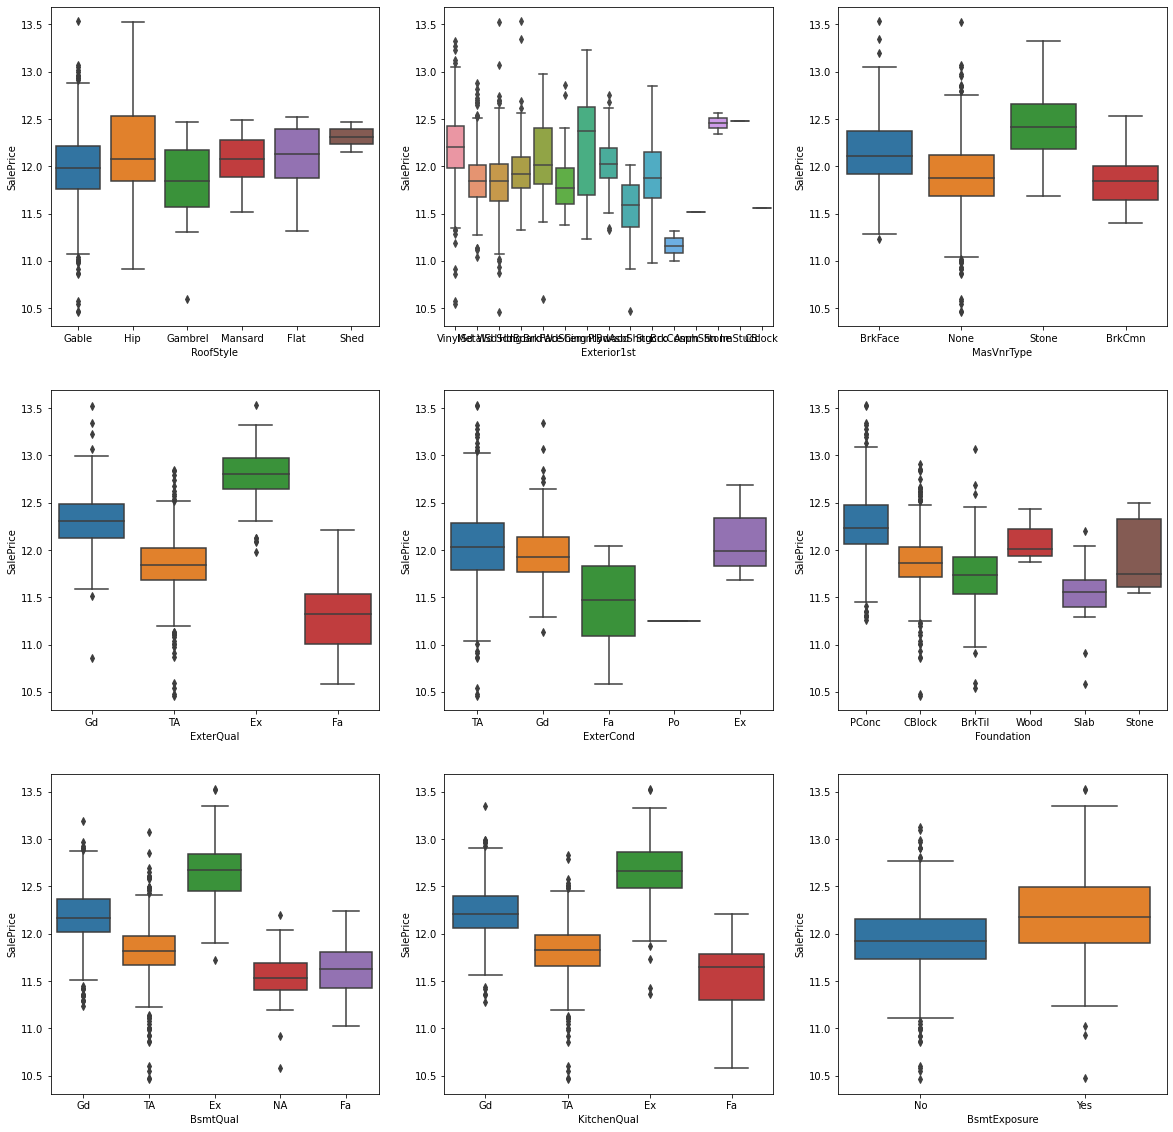

In [154]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(data=house_df, x='RoofStyle', y="SalePrice")
plt.subplot(3,3,2)
sns.boxplot(data=house_df, x='Exterior1st', y="SalePrice")
plt.subplot(3,3,3)
sns.boxplot(data=house_df, x='MasVnrType', y="SalePrice")
plt.subplot(3,3,4)
sns.boxplot(data=house_df, x='ExterQual', y="SalePrice")
plt.subplot(3,3,5)
sns.boxplot(data=house_df, x='ExterCond', y="SalePrice")
plt.subplot(3,3,6)
sns.boxplot(data=house_df, x='Foundation', y="SalePrice")
plt.subplot(3,3,7)
sns.boxplot(data=house_df, x='BsmtQual', y="SalePrice")
plt.subplot(3,3,8)
sns.boxplot(data=house_df, x='KitchenQual', y="SalePrice")
plt.subplot(3,3,9)
sns.boxplot(data=house_df, x='BsmtExposure', y="SalePrice")
plt.show()

### Dummy variable Creation

All the categorical variables are converted using dummy variable and dropping the first column

In [155]:
dummy_valueadd = pd.get_dummies(house_df[categorical_value.columns], drop_first=True)
dummy_valueadd.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  MoSold_Mar  MoSold_May  MoSold_Nov  MoSold_Oct  MoSold_Sep  \
0  ...           0           0           0           0           0   
1  ...           0           1           0           0           0   
2  ...           0           0           0           0           1   
3  ...           0           0           0           0           0   
4  ...           0           0           0           0           0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 139 columns]

Now all the dummy variables are created for all the categories. We need to concat this list with the master df, and remove the main columns.

In [156]:
# Concatinating with the master dataframe step
house_df = pd.concat([house_df, dummy_valueadd], axis=1)

In [157]:
house_df.drop(categorical_value.columns, axis = 1, inplace = True)

In [158]:
house_df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  TotalBsmtSF  \
0         65.0     8450            7            5       196.0          856   
1         80.0     9600            6            8         0.0         1262   
2         68.0    11250            7            5       162.0          920   
3         60.0     9550            7            5         0.0          756   
4         84.0    14260            8            5       350.0         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  MoSold_Mar  MoSold_May  \
0       856       854       1710             1  ...           0           0   
1      1262         0       1262             0  ...           0           1   
2       920       866       1786             1  ...           0           0   
3       961       756       1717             1  ...           0           0   
4      1145      1053       2198             1  ...           0           0   

   MoSold_Nov  MoSold_Oct  MoSold_Sep  SaleCondition_AdjLand  \
0           0           0           0                      0   
1           0           0           0                      0   
2           0           0           1                      0   
3           0           0           0                      0   
4           0           0           0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 160 columns]

In [159]:
house_df.shape

(1460, 160)

## Train Test Split

The Train and Test data splitted into 70% and 30% values with 70% as Train data and 30% as Test data

In [160]:
np.random.seed(0)

X_train, X_test = train_test_split(house_df, test_size=0.3,  random_state=40)

In [161]:
print(X_train.shape)
print(X_test.shape)

(1022, 160)
(438, 160)


In [162]:
X_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  TotalBsmtSF  \
498          65.0     7800            5            7        89.0          864   
8            51.0     6120            7            5         0.0          952   
309          90.0    12378            9            5         0.0         1896   
957          70.0     7420            5            5         0.0         1057   
1022         52.0     9439            5            5         0.0          912   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  MoSold_Mar  \
498        899         0        899             0  ...           0   
8         1022       752       1774             0  ...           0   
309       1944         0       1944             1  ...           0   
957       1057         0       1057             0  ...           0   
1022       912       336       1248             0  ...           1   

      MoSold_May  MoSold_Nov  MoSold_Oct  MoSold_Sep  SaleCondition_AdjLand  \
498            0           0           0           0                      0   
8              0           0           0           0                      0   
309            0           1           0           0                      0   
957            0           0           0           0                      0   
1022           0           0           0           0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
498                      0                     0                     1   
8                        0                     0                     0   
309                      0                     0                     1   
957                      0                     0                     1   
1022                     0                     0                     1   

      SaleCondition_Partial  
498                       0  
8                         0  
309                       0  
957                       0  
1022                      0  

[5 rows x 160 columns]

In [163]:
X_test.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  TotalBsmtSF  \
1258         59.0     9587            7            5       182.0          856   
1041         69.0     9130            6            8       252.0          800   
1181         64.0     5587            8            5       186.0         1600   
1108         69.0     8063            6            5         0.0          924   
554          85.0    10625            7            5       292.0          998   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  MoSold_Mar  \
1258      1166         0       1166             1  ...           0   
1041       800       832       1632             0  ...           0   
1181      1652         0       1652             1  ...           0   
1108       948       742       1690             0  ...           0   
554       1006      1040       2046             1  ...           0   

      MoSold_May  MoSold_Nov  MoSold_Oct  MoSold_Sep  SaleCondition_AdjLand  \
1258           0           0           0           0                      0   
1041           0           0           0           0                      0   
1181           0           1           0           0                      0   
1108           0           1           0           0                      0   
554            0           0           0           0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1258                     0                     0                     1   
1041                     0                     0                     1   
1181                     0                     0                     0   
1108                     0                     0                     0   
554                      0                     0                     1   

      SaleCondition_Partial  
1258                      0  
1041                      0  
1181                      1  
1108                      0  
554                       0  

[5 rows x 160 columns]

### Scaler - MinMax Scaling

Since the coefficient values are in different range, we need to bring it in a range of values. The values range should be in range of 0 to 1. The max value range should be 1.

In [164]:
# Scaling high valued features to range of [0,1] using MinMax Scaler
scaler = MinMaxScaler()


In [165]:
X_train[numerical_value.columns] = scaler.fit_transform(X_train[numerical_value.columns])
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
498      0.150685  0.029579     0.444444         0.75    0.055625   
8        0.102740  0.021720     0.666667         0.50    0.000000   
309      0.236301  0.050995     0.888889         0.50    0.000000   
957      0.167808  0.027801     0.444444         0.50    0.000000   
1022     0.106164  0.037246     0.444444         0.50    0.000000   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  \
498      0.141408  0.129647  0.000000   0.106443           0.0  ...   
8        0.155810  0.157871  0.364165   0.271289           0.0  ...   
309      0.310311  0.369436  0.000000   0.303316           1.0  ...   
957      0.172995  0.165902  0.000000   0.136209           0.0  ...   
1022     0.149264  0.132630  0.162712   0.172193           0.0  ...   

      MoSold_Mar  MoSold_May  MoSold_Nov  MoSold_Oct  MoSold_Sep  \
498            0           0           0           0           0   
8              0           0           0           0           0   
309            0           0           1           0           0   
957            0           0           0           0           0   
1022           1           0           0           0           0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
498                       0                     0                     0   
8                         0                     0                     0   
309                       0                     0                     0   
957                       0                     0                     0   
1022                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
498                      1                      0  
8                        0                      0  
309                      1                      0  
957                      1                      0  
1022                     1                      0  

[5 rows x 160 columns]

In [166]:
X_train.shape

(1022, 160)

In [167]:
# apply rescaling to the test set also
X_test[numerical_value.columns] = scaler.transform(X_test[numerical_value.columns])
X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1258     0.130137  0.037938     0.666667        0.500     0.11375   
1041     0.164384  0.035800     0.555556        0.875     0.15750   
1181     0.147260  0.019226     0.777778        0.500     0.11625   
1108     0.164384  0.030809     0.555556        0.500     0.00000   
554      0.219178  0.042794     0.666667        0.500     0.18250   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  \
1258     0.140098  0.190913  0.000000   0.156745           1.0  ...   
1041     0.130933  0.106930  0.402906   0.244537           0.0  ...   
1181     0.261866  0.302432  0.000000   0.248304           1.0  ...   
1108     0.151227  0.140890  0.359322   0.255463           0.0  ...   
554      0.163339  0.154199  0.503632   0.322532           1.0  ...   

      MoSold_Mar  MoSold_May  MoSold_Nov  MoSold_Oct  MoSold_Sep  \
1258           0           0           0           0           0   
1041           0           0           0           0           0   
1181           0           0           1           0           0   
1108           0           0           1           0           0   
554            0           0           0           0           0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1258                      0                     0                     0   
1041                      0                     0                     0   
1181                      0                     0                     0   
1108                      0                     0                     0   
554                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1258                     1                      0  
1041                     1                      0  
1181                     0                      1  
1108                     0                      0  
554                      1                      0  

[5 rows x 160 columns]

In [168]:
# SalePrice is a target variable
y_train = X_train.pop('SalePrice')

In [169]:
y_test = X_test.pop('SalePrice')

In [170]:
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
498      0.150685  0.029579     0.444444         0.75    0.055625   
8        0.102740  0.021720     0.666667         0.50    0.000000   
309      0.236301  0.050995     0.888889         0.50    0.000000   
957      0.167808  0.027801     0.444444         0.50    0.000000   
1022     0.106164  0.037246     0.444444         0.50    0.000000   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  \
498      0.141408  0.129647  0.000000   0.106443           0.0  ...   
8        0.155810  0.157871  0.364165   0.271289           0.0  ...   
309      0.310311  0.369436  0.000000   0.303316           1.0  ...   
957      0.172995  0.165902  0.000000   0.136209           0.0  ...   
1022     0.149264  0.132630  0.162712   0.172193           0.0  ...   

      MoSold_Mar  MoSold_May  MoSold_Nov  MoSold_Oct  MoSold_Sep  \
498            0           0           0           0           0   
8              0           0           0           0           0   
309            0           0           1           0           0   
957            0           0           0           0           0   
1022           1           0           0           0           0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
498                       0                     0                     0   
8                         0                     0                     0   
309                       0                     0                     0   
957                       0                     0                     0   
1022                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
498                      1                      0  
8                        0                      0  
309                      1                      0  
957                      1                      0  
1022                     1                      0  

[5 rows x 159 columns]

In [171]:
X_train.describe()

LotFrontage      LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.167547     0.043952     0.566862     0.568615     0.065431   
std       0.073652     0.054085     0.155254     0.139030     0.115958   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.133562     0.029008     0.444444     0.500000     0.000000   
50%       0.164384     0.037772     0.555556     0.500000     0.000000   
75%       0.198630     0.048107     0.666667     0.625000     0.100469   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  ...  \
count  1022.000000  1022.000000  1022.000000  1022.000000   1022.000000  ...   
mean      0.173799     0.191141     0.164871     0.222319      0.416830  ...   
std       0.074096     0.090699     0.210990     0.101823      0.493276  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.130155     0.126606     0.000000     0.147702      0.000000  ...   
50%       0.162357     0.173015     0.000000     0.211379      0.000000  ...   
75%       0.213666     0.242772     0.348668     0.273832      1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000      1.000000  ...   

        MoSold_Mar   MoSold_May   MoSold_Nov   MoSold_Oct   MoSold_Sep  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.075342     0.140900     0.052838     0.058708     0.045010   
std       0.264072     0.348089     0.223819     0.235193     0.207427   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
count            1022.000000           1022.000000           1022.000000   
mean                0.002935              0.008806              0.013699   
std                 0.054126              0.093473              0.116294   
min                 0.000000              0.000000              0.000000   
25%                 0.000000              0.000000              0.000000   
50%                 0.000000              0.000000              0.000000   
75%                 0.000000              0.000000              0.000000   
max                 1.000000              1.000000              1.000000   

       SaleCondition_Normal  SaleCondition_Partial  
count           1022.000000             1022.00000  
mean               0.822896                0.09002  
std                0.381943                0.28635  
min                0.000000                0.00000  
25%                1.000000                0.00000  
50%                1.000000                0.00000  
75%                1.000000                0.00000  
max                1.000000                1.00000  

[8 rows x 159 columns]

Since we used MinMaxScaler, the min value is in the range of 0 and the max value is 1

In [172]:
y_train.head()

498     0.427765
8       0.427514
309     0.759090
957     0.432731
1022    0.297122
Name: SalePrice, dtype: float64

The Linear Regression object is inisitiated.

In [173]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression()

In [174]:
# The Coefficients , intercepts values are below

lin_regressor.coef_
lin_regressor.intercept_

-0.045194328684022844

In [175]:
# RFE method is used in the method to filter 30 features out from the total list.
filter_features = RFE(lin_regressor, 30)
rfe = filter_features.fit(X_train, y_train)

In [176]:
rfe_list = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_list 

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 107),
 ('TotalBsmtSF', False, 45),
 ('1stFlrSF', False, 10),
 ('2ndFlrSF', False, 86),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 92),
 ('FullBath', True, 1),
 ('HalfBath', False, 58),
 ('BedroomAbvGr', False, 81),
 ('TotRmsAbvGrd', False, 49),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 128),
 ('EnclosedPorch', False, 68),
 ('HouseAge', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 8),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 22),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 2),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  6),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 20),
 ('MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', False, 12),
 ('MSSubClass_2-1/2 STORY ALL AGES', False, 9),
 ('MSSubClass_2-STORY 1945 &

In [177]:
# The rfe feature which has 1 Ranking alone is selected. The RFE supported list ranking is done. only 30 features are selected.
rfe_selected = X_train.columns[rfe.support_]
rfe_selected

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea',
       'FullBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'HouseAge',
       'MSSubClass_SPLIT FOYER', 'MSZoning_Floating Village Residential',
       'MSZoning_Residential High Density', 'MSZoning_Residential Low Density',
       'MSZoning_Residential Medium Density', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Foundation_Stone',
       'BsmtQual_NA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd'],
      dtype='object')

In [178]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[rfe_selected]

In [179]:
# The Ranking other than 50 will be excluded
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'OpenPorchSF',
       'EnclosedPorch',
       ...
       'MoSold_Mar', 'MoSold_May', 'MoSold_Nov', 'MoSold_Oct', 'MoSold_Sep',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=129)

##### Deleting all other columns which are not part of the RFE selected 30 columns, we are going to use only these 30 features from now on for our final analysis for linear model and regularization techniques - Ridge and Lasso

In [180]:
X_train = X_train[rfe_selected]
X_test = X_test[rfe_selected]

##### Lets analyse the Linear model now to check the pvalue and VIF

In [181]:
X_train_lr = X_train
X_train_lr.shape

(1022, 30)

In [182]:
# Adding a constant variable using add constant from stats models library
X_train_new = sm.add_constant(X_train_lr)

In [183]:
# Running the linear model
lin_model = sm.OLS(y_train,X_train_new).fit()  

In [184]:
#The summary of the linear model is printed for verification
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     228.2
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:37   Log-Likelihood:                 1670.0
No. Observations:                1022   AIC:                            -3278.
Df Residuals:                     991   BIC:                            -3125.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

We can see that R2 and Adjusted R2 difference is not much.
The Pvalue is high for few of the fields, lets remove those fields

In [185]:
###removing the LotFrontage feature from the list, since it has the pvalue as 0.932
X_train_new = X_train_rfe.drop(["LotFrontage"], axis = 1)

In [186]:
### adding constant
X_train_lm = sm.add_constant(X_train_new)

In [187]:
# Running the linear regression model
lin_model = sm.OLS(y_train,X_train_lm).fit()   

In [188]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     236.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:38   Log-Likelihood:                 1670.0
No. Observations:                1022   AIC:                            -3280.
Df Residuals:                     992   BIC:                            -3132.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [189]:
###removing the Exterior1st_ImStucc feature from the list since pvalue is 0.492
X_train_new = X_train_new.drop(["Exterior1st_ImStucc"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()

In [190]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:38   Log-Likelihood:                 1669.7
No. Observations:                1022   AIC:                            -3281.
Df Residuals:                     993   BIC:                            -3139.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [191]:
###removing the Foundation_Stone feature from the list as it has 0.380 as pvalue
X_train_new = X_train_new.drop(["Foundation_Stone"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     253.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:38   Log-Likelihood:                 1669.3
No. Observations:                1022   AIC:                            -3283.
Df Residuals:                     994   BIC:                            -3145.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [192]:
###removing the MSSubClass_SPLIT FOYER feature from the list as it has 0.253 as pvalue
X_train_new = X_train_new.drop(["MSSubClass_SPLIT FOYER"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     263.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:38   Log-Likelihood:                 1668.7
No. Observations:                1022   AIC:                            -3283.
Df Residuals:                     995   BIC:                            -3150.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [193]:
###removing the FullBath feature from the list as it has 0.055 as pvalue
X_train_new = X_train_new.drop(["FullBath"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:39   Log-Likelihood:                 1666.8
No. Observations:                1022   AIC:                            -3282.
Df Residuals:                     996   BIC:                            -3153.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Now that all the pvalue is less than 0.05, we can check the VIF value

In [194]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10       MSZoning_Residential Low Density  80.92
21                      GarageType_Attchd  54.64
1                             OverallQual  42.97
24                      GarageType_Detchd  23.14
2                             OverallCond  21.36
11    MSZoning_Residential Medium Density  16.52
3                               GrLivArea  12.24
5                              GarageCars  11.50
23                     GarageType_BuiltIn   6.00
8   MSZoning_Floating Village Residential   5.86
7                                HouseAge   3.77
4                              Fireplaces   2.87
0                                 LotArea   2.11
9       MSZoning_Residential High Density   2.01
22                     GarageType_Basment   1.84
6                              WoodDeckSF   1.83
15                   Neighborhood_NridgHt   1.33
14                   Neighborhood_NoRidge   1.22
13                   Neighborhood_Crawfor   1.21
12                   Neighborhood_ClearCr   1.17
19                    Exterior1st_BrkFace   1.15
16                   Neighborhood_StoneBr   1.13
20                            BsmtQual_NA   1.13
17                   Neighborhood_Veenker   1.06
18                    Exterior1st_BrkComm   1.03

In [195]:
###removing the MSZoning_Residential Low Density feature from the list as it has high VIF value
X_train_new = X_train_new.drop(["MSZoning_Residential Low Density"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:39   Log-Likelihood:                 1638.5
No. Observations:                1022   AIC:                            -3227.
Df Residuals:                     997   BIC:                            -3104.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [196]:
###removing the MSZoning_Residential High Density feature from the list as it has pvalue as 0.924
X_train_new = X_train_new.drop(["MSZoning_Residential High Density"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     279.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:39   Log-Likelihood:                 1638.5
No. Observations:                1022   AIC:                            -3229.
Df Residuals:                     998   BIC:                            -3111.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [197]:
###removing the GarageType_Basment feature from the list as it has pvalue as 0.154
X_train_new = X_train_new.drop(["GarageType_Basment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     291.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:39   Log-Likelihood:                 1637.5
No. Observations:                1022   AIC:                            -3229.
Df Residuals:                     999   BIC:                            -3116.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [198]:
###removing the GarageType_Detchd feature from the list as it has pvalue of 0.123
X_train_new = X_train_new.drop(["GarageType_Detchd"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     304.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:39   Log-Likelihood:                 1636.3
No. Observations:                1022   AIC:                            -3229.
Df Residuals:                    1000   BIC:                            -3120.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [199]:
###removing the GarageType_BuiltIn feature from the list as it has pvalue as 0.058
X_train_new = X_train_new.drop(["GarageType_BuiltIn"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     319.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:39   Log-Likelihood:                 1634.4
No. Observations:                1022   AIC:                            -3227.
Df Residuals:                    1001   BIC:                            -3123.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [200]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                             OverallQual  32.55
3                               GrLivArea  11.67
2                             OverallCond  11.59
5                              GarageCars  10.83
19                      GarageType_Attchd   3.34
4                              Fireplaces   2.78
7                                HouseAge   2.44
0                                 LotArea   2.10
6                              WoodDeckSF   1.83
9     MSZoning_Residential Medium Density   1.41
13                   Neighborhood_NridgHt   1.31
8   MSZoning_Floating Village Residential   1.22
12                   Neighborhood_NoRidge   1.19
11                   Neighborhood_Crawfor   1.17
10                   Neighborhood_ClearCr   1.17
17                    Exterior1st_BrkFace   1.14
14                   Neighborhood_StoneBr   1.11
18                            BsmtQual_NA   1.08
15                   Neighborhood_Veenker   1.06
16                    Exterior1st_BrkComm   1.03

since we have noticed in heatmap that 'OverallQual','GrLivArea','GarageCars','HouseAge' are highly correlated with the dependant variable. Hence removing other feature having high vif

In [201]:
###removing the OverallCond feature from the list as it has high VIF value
X_train_new = X_train_new.drop(["OverallCond"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     325.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:40   Log-Likelihood:                 1619.6
No. Observations:                1022   AIC:                            -3199.
Df Residuals:                    1002   BIC:                            -3101.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [202]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                             OverallQual  22.75
2                               GrLivArea  11.63
4                              GarageCars  10.83
18                      GarageType_Attchd   3.33
3                              Fireplaces   2.74
6                                HouseAge   2.19
0                                 LotArea   2.09
5                              WoodDeckSF   1.82
8     MSZoning_Residential Medium Density   1.36
12                   Neighborhood_NridgHt   1.25
7   MSZoning_Floating Village Residential   1.20
11                   Neighborhood_NoRidge   1.17
9                    Neighborhood_ClearCr   1.17
10                   Neighborhood_Crawfor   1.15
16                    Exterior1st_BrkFace   1.14
13                   Neighborhood_StoneBr   1.09
17                            BsmtQual_NA   1.08
14                   Neighborhood_Veenker   1.06
15                    Exterior1st_BrkComm   1.03

We can notice that these independent variables are also highly correlated just as the dependent variable. Hence we have no choice other thn removing these fields one by one.

In [203]:
###removing the KitchenQual_TA feature from the list as it has VIF value
X_train_new = X_train_new.drop(["OverallQual"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.2
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:40   Log-Likelihood:                 1503.3
No. Observations:                1022   AIC:                            -2969.
Df Residuals:                    1003   BIC:                            -2875.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [204]:
###removing the Neighborhood_ClearCr feature from the list it has pvalue as 0.073
X_train_new = X_train_new.drop(["Neighborhood_ClearCr"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     276.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:40   Log-Likelihood:                 1501.6
No. Observations:                1022   AIC:                            -2967.
Df Residuals:                    1004   BIC:                            -2878.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [205]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                               GrLivArea  8.62
3                              GarageCars  7.09
2                              Fireplaces  2.72
16                      GarageType_Attchd  2.62
5                                HouseAge  2.12
0                                 LotArea  1.95
4                              WoodDeckSF  1.81
7     MSZoning_Residential Medium Density  1.29
10                   Neighborhood_NridgHt  1.21
9                    Neighborhood_NoRidge  1.16
6   MSZoning_Floating Village Residential  1.14
14                    Exterior1st_BrkFace  1.14
8                    Neighborhood_Crawfor  1.14
15                            BsmtQual_NA  1.08
11                   Neighborhood_StoneBr  1.07
12                   Neighborhood_Veenker  1.06
13                    Exterior1st_BrkComm  1.02

In [206]:
###removing the GrLivArea feature from the list as it has high VIF value
X_train_new = X_train_new.drop(["GrLivArea"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          4.62e-306
Time:                        17:20:41   Log-Likelihood:                 1362.1
No. Observations:                1022   AIC:                            -2690.
Df Residuals:                    1005   BIC:                            -2606.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [207]:
###removing the Neighborhood_Veenker feature from the list as it has high p value 0.152
X_train_new = X_train_new.drop(["Neighborhood_Veenker"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          8.48e-307
Time:                        17:20:41   Log-Likelihood:                 1361.0
No. Observations:                1022   AIC:                            -2690.
Df Residuals:                    1006   BIC:                            -2611.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [208]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                              GarageCars  4.48
14                      GarageType_Attchd  2.56
1                              Fireplaces  2.48
4                                HouseAge  2.06
0                                 LotArea  1.89
3                              WoodDeckSF  1.78
6     MSZoning_Residential Medium Density  1.27
9                    Neighborhood_NridgHt  1.20
5   MSZoning_Floating Village Residential  1.13
7                    Neighborhood_Crawfor  1.12
8                    Neighborhood_NoRidge  1.11
12                    Exterior1st_BrkFace  1.11
10                   Neighborhood_StoneBr  1.07
13                            BsmtQual_NA  1.07
11                    Exterior1st_BrkComm  1.02

Now we can notice that the pvalue and VIF value are in the range.
The final list of features are decided

In [209]:
X_train_new.columns

Index(['LotArea', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'HouseAge',
       'MSZoning_Floating Village Residential',
       'MSZoning_Residential Medium Density', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'BsmtQual_NA',
       'GarageType_Attchd'],
      dtype='object')

In [210]:
X_train_lr = X_train_new

In [211]:
# The value is predicted for train data.
y_pred_train = lin_model.predict(X_train_lm)
# R2 score and Mean Squared error is calculated
r2_train_lr = r2_score(y_train, y_pred_train)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train R2 score: ', r2_train_lr)
print('Train MSE score: ', mse_train_lr)

Train R2 score:  0.7685088853337156
Train MSE score:  0.0040813401292206205


In [212]:
#Residual Sum of Squares 
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS is :",rss_train_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE is : ",mse_train_lr)
# Root Mean Squared Error
rmse_train_lr = mse_train_lr**0.5
print("RMSE is : ",rmse_train_lr)

RSS is : 4.171129612063474
MSE is :  0.0040813401292206205
RMSE is :  0.06388536709779964


In [213]:
#### Taking test model with the columns which are used in train set alone
X_test_newmodel = X_test[X_train_new.columns]

In [214]:
X_test_newmodel = sm.add_constant(X_test_newmodel)

In [215]:
# Test values are prediced properly.
y_pred_test = lin_model.predict(X_test_newmodel)

In [216]:
# R2 score and Mean square error for Test data
r2_test_lr = r2_score(y_test, y_pred_test)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test R2 score: ', r2_test_lr)
print('Test MSE score: ', mse_test_lr)

Test R2 score:  0.6960672640929015
Test MSE score:  0.004587724916854592


In [217]:
#Residual Sum of Squares
rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS is :",rss_test_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE is : ",mse_test_lr)
# Root Mean Squared Error
rmse_test_lr = mse_test_lr**0.5
print("RMSE is : ",rmse_test_lr)

RSS is : 2.0094235135823113
MSE is :  0.004587724916854592
RMSE is :  0.06773274626688772


In [218]:
# result_df is created with the values for the basic vanila model
result_df = pd.DataFrame(columns=('Model', 'R2', 'RSS','MSE','RMSE','Type'))
result_df.loc[0] = ['Vanila',r2_train_lr, rss_train_lr, mse_train_lr, rmse_train_lr, 'Train']
result_df.loc[1] = ['Vanila',r2_test_lr, rss_test_lr, mse_test_lr, rmse_test_lr, 'Test']
result_df

Model        R2       RSS       MSE      RMSE   Type
0  Vanila  0.768509  4.171130  0.004081  0.063885  Train
1  Vanila  0.696067  2.009424  0.004588  0.067733   Test

The R2 is 76.8% and Adjusted R2 is 76.5% in the train data. So the model is proper.

The R2 value of Train and Test data are 76.8% and 69.60% which is good

In [219]:
X_train_new.columns

Index(['LotArea', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'HouseAge',
       'MSZoning_Floating Village Residential',
       'MSZoning_Residential Medium Density', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'BsmtQual_NA',
       'GarageType_Attchd'],
      dtype='object')

Lets perform residual analysis

In [220]:
X_train_lr = X_train[X_train_new.columns]
X_test_lr = X_test[X_train_new.columns]

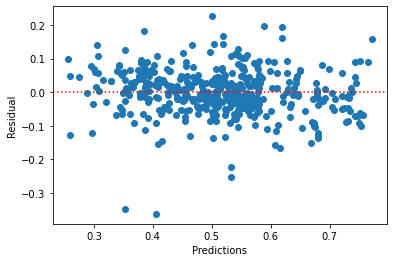

In [221]:
# Residual analysis
y_res = y_test - y_pred_test
#y_res
X_test_lr['res'] = y_res
plt.scatter( y_pred_test , X_test_lr['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

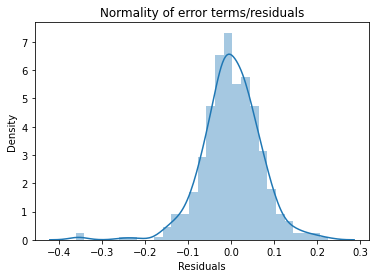

In [222]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [223]:
X_test_lr = X_test_lr.drop(['res'],axis=1)


### Lets now check with the Regularisation methods - Both Ridge and Lasso

In [224]:
X_train.shape

(1022, 30)

In [225]:
X_test.shape

(438, 30)

Now that we are going to perform the Ridge and Lasso regression, lets take the df which has RFE selected 30 feature and not the feature reduced in linear model.
- Ridge will retain all the 30 features present
- Lasso will perform feature selection and reduce the coefficient value to 0

In [226]:
X_train_ridge = X_train
X_test_ridge = X_test

## Ridge Regression

In [227]:
# Lets build the initial model with the  alpha as 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train_ridge,y_train)

y_train_predRidge = ridge.predict(X_train_ridge)
print(r2_score(y_train,y_train_predRidge))

0.8735382431285996


The different values of the alpha is taken for the params list

In [228]:
ridge = Ridge()

# list of alphas taken for the different values checking
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100,500, 1000]}

In [229]:
# cross validation performation
# Folds are taken as 5
folds = 5
# The scoring is taken for the neg_mean_absolute_error value and the different parameter values are passed in GridSearchCV value
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
           
model_cv.fit(X_train_ridge, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [230]:
# The Results are taken in the resultant dataframe
cv_results_ridge = pd.DataFrame(model_cv.cv_results_)

cv_results_ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007795      0.000746         0.004997        0.001094      0.0001   
1       0.011793      0.004954         0.005597        0.000800      0.0005   
2       0.009395      0.001020         0.006197        0.000979       0.001   
3       0.008595      0.001019         0.005598        0.001020       0.005   
4       0.007795      0.001166         0.004798        0.000400        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.031469          -0.035422          -0.040151   
1  {'alpha': 0.0005}          -0.031468          -0.035421          -0.040151   
2   {'alpha': 0.001}          -0.031468          -0.035420          -0.040152   
3   {'alpha': 0.005}          -0.031466          -0.035413          -0.040158   
4    {'alpha': 0.01}          -0.031463          -0.035404          -0.040165   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.035584  ...        -0.035559        0.002756                7   
1          -0.035584  ...        -0.035559        0.002757                6   
2          -0.035584  ...        -0.035559        0.002757                5   
3          -0.035583  ...        -0.035558        0.002760                4   
4          -0.035582  ...        -0.035557        0.002763                3   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.034724           -0.033172           -0.032882   
1           -0.034724           -0.033172           -0.032882   
2           -0.034725           -0.033172           -0.032883   
3           -0.034727           -0.033175           -0.032885   
4           -0.034730           -0.033178           -0.032887   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.033840           -0.033713         -0.033666         0.000634  
1           -0.033840           -0.033714         -0.033667         0.000634  
2           -0.033840           -0.033714         -0.033667         0.000634  
3           -0.033842           -0.033716         -0.033669         0.000634  
4           -0.033844           -0.033720         -0.033672         0.000634  

[5 rows x 21 columns]

In [231]:
## The test and Train mean score values
mean_train_score = model_cv.cv_results_['mean_train_score']
mean_test_score = model_cv.cv_results_['mean_test_score']
print("mean_train_score is : ", mean_train_score)
print("mean_test_score is : ", mean_test_score)

mean_train_score is :  [-0.03366632 -0.03366654 -0.03366681 -0.03366899 -0.03367171 -0.03369368
 -0.0337223  -0.03395258 -0.03424738 -0.03606451 -0.03797504 -0.04842756
 -0.05661912 -0.08010533 -0.08863808]
mean_test_score is :  [-0.03555925 -0.03555915 -0.03555902 -0.03555801 -0.03555683 -0.0355495
 -0.03554853 -0.03564251 -0.03577648 -0.03719981 -0.03888492 -0.0489364
 -0.05704618 -0.0803846  -0.08888953]


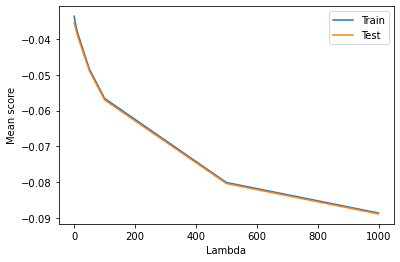

In [232]:
# The plotting is done

plt_data_train = [[params['alpha'][r], mean_train_score[r], 'Train'] for r in range(len(params['alpha']))]
plt_data_test = [[params['alpha'][r], mean_test_score[r], 'Test'] for r in range(len(params['alpha']))]

plt_data_train = pd.DataFrame(plt_data_train,columns=['Lambda','Value','Data'])
plt_data_test = pd.DataFrame(plt_data_test,columns=['Lambda','Value','Data'])

plt_data = pd.concat([plt_data_train, plt_data_test])

ax = sns.lineplot(x=plt_data['Lambda'], y=plt_data['Value'], hue=plt_data['Data'])
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean score')
plt.show()

In [233]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.1}


The Best score for Alpha value is 0.1

In [234]:
print(model_cv.best_score_)

-0.03554853295391636


The Best score received is -0.03554853295391636

In [235]:
Ridgealpha = model_cv.best_params_['alpha']
Ridgealpha

0.1

In [236]:
#Fitting Ridge model for alpha

ridge = Ridge(alpha=Ridgealpha)

ridge.fit(X_train_ridge, y_train)


Ridge(alpha=0.1)

In [237]:
print(ridge.coef_)

[-0.00033267  0.11393548  0.25386498  0.06426303  0.26464154  0.02549269
  0.03977126  0.15553249  0.04621941 -0.04241176  0.01536336  0.1733505
  0.14990948  0.15173074  0.1019665   0.03823372  0.03908881  0.06016657
  0.06221     0.0726995   0.04256467 -0.09431306  0.03525169 -0.03085258
 -0.03760763 -0.05506795  0.05685558  0.04277668  0.0501475   0.036806  ]


In [238]:
# Metric Evaluation for ridge regression

y_ridgepred_train = ridge.predict(X_train_ridge)
# R2 and mean square error
r2_train_ridge = r2_score(y_train, y_ridgepred_train)
mse_train_ridge = mean_squared_error(y_train, y_ridgepred_train)
print('Train R2 score: ', r2_train_ridge)
print('Train MSE score: ', mse_train_ridge)

Train R2 score:  0.8734797523139128
Train MSE score:  0.0022306349199819517


- Train R2 score:  0.8734797523139128
- Train MSE score:  0.0022306349199819517

In [239]:
#Residual Sum of Squares 
rss_train_Ridge = np.sum(np.square(y_train - y_ridgepred_train))
print("RSS is :",rss_train_Ridge)
mse_train_Ridge = mean_squared_error(y_train, y_ridgepred_train)
print("MSE is : ",mse_train_Ridge)
# Root Mean Squared Error
rmse_train_Ridge = mse_train_Ridge**0.5
print("RMSE is : ",rmse_train_Ridge)


RSS is : 2.279708888221555
MSE is :  0.0022306349199819517
RMSE is :  0.0472295979231451


In [240]:
y_ridgepred_test = ridge.predict(X_test_ridge)
r2_test_ridge = r2_score(y_test, y_ridgepred_test)
mse_test_ridge = mean_squared_error(y_test, y_ridgepred_test)
print('Test R2 score: ', r2_test_ridge)
print('Test MSE score: ', mse_test_ridge)

Test R2 score:  0.8399982456780787
Test MSE score:  0.002415152921426328


- Test R2 score:  0.8399982456780787
- Test MSE score:  0.002415152921426328

In [241]:
#Residual Sum of Squares
rss_test_ridge = np.sum(np.square(y_test - y_ridgepred_test))
print("RSS is :",rss_test_ridge)
mse_test_ridge = mean_squared_error(y_test, y_ridgepred_test)
print("MSE is : ",mse_test_ridge)
# Root Mean Squared Error
rmse_test_ridge = mse_test_ridge**0.5
print("RMSE is : ",rmse_test_ridge)

RSS is : 1.0578369795847316
MSE is :  0.002415152921426328
RMSE is :  0.04914420536977201


In [242]:
result_df.loc[2] = ['Ridge',r2_train_ridge, rss_train_Ridge, mse_train_Ridge, rmse_train_Ridge,  'Train']
result_df.loc[3] = ['Ridge',r2_test_ridge, rss_test_ridge, mse_test_ridge, rmse_test_ridge,  'Test']
result_df

Model        R2       RSS       MSE      RMSE   Type
0  Vanila  0.768509  4.171130  0.004081  0.063885  Train
1  Vanila  0.696067  2.009424  0.004588  0.067733   Test
2   Ridge  0.873480  2.279709  0.002231  0.047230  Train
3   Ridge  0.839998  1.057837  0.002415  0.049144   Test

In [243]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_test_ridge.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head()

Features  Coefficient       Mod
5                              FullBath     0.264642  0.264642
3                           OverallCond     0.253865  0.253865
12    MSZoning_Residential High Density     0.173351  0.173351
8                            WoodDeckSF     0.155532  0.155532
14  MSZoning_Residential Medium Density     0.151731  0.151731

Now we have found that the alpha value as 0.1 and the R2 value for the Train and Test value obtained from the Ridge regression are  0.873480 and 0.839998 respectively
#### Lets now analyse with Lasso model

In [244]:
X_train_lasso = X_train
X_test_lasso = X_test

## Lasso Regression

In [245]:
lasso = Lasso()

# list of alphas to be used in the GridSearchCV
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [246]:
# cross validation
# No of folds taken as 5
folds = 5
# Grid search model is used for the verification with the list of parameters and the scoring as R2
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
       
model_cv_lasso.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [247]:
# The Results are taken in the dataframe
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.011188      0.002131         0.004006        0.000008      0.0001   
1       0.006403      0.000484         0.004000        0.000902      0.0005   
2       0.006996      0.000894         0.004198        0.000747       0.001   
3       0.008994      0.001548         0.004798        0.000747       0.005   
4       0.006427      0.001492         0.004597        0.001018        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.032026          -0.034909          -0.041553   
1  {'alpha': 0.0005}          -0.034290          -0.034763          -0.043031   
2   {'alpha': 0.001}          -0.036980          -0.035983          -0.045406   
3   {'alpha': 0.005}          -0.047646          -0.046078          -0.057064   
4    {'alpha': 0.01}          -0.064130          -0.062156          -0.074056   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.035215  ...        -0.035818        0.003119                1   
1          -0.034795  ...        -0.036950        0.003296                2   
2          -0.037058  ...        -0.039189        0.003468                3   
3          -0.053523  ...        -0.051515        0.004060                4   
4          -0.075519  ...        -0.069538        0.005389                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.035145           -0.033858           -0.033373   
1           -0.036547           -0.035797           -0.034472   
2           -0.039091           -0.038152           -0.037250   
3           -0.051257           -0.050802           -0.049712   
4           -0.068622           -0.068345           -0.068072   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.034450           -0.034205         -0.034206         0.000593  
1           -0.036330           -0.035850         -0.035799         0.000722  
2           -0.038859           -0.037925         -0.038255         0.000662  
3           -0.051709           -0.050772         -0.050850         0.000664  
4           -0.069649           -0.067894         -0.068516         0.000618  

[5 rows x 21 columns]

In [248]:
# The train and the test mean score
mean_train_score = model_cv_lasso.cv_results_['mean_train_score']
mean_test_score = model_cv_lasso.cv_results_['mean_test_score']
print("mean_train_score is : ", mean_train_score)
print("mean_test_score is : ", mean_test_score)

mean_train_score is :  [-0.034206   -0.03579919 -0.03825529 -0.05085034 -0.06851611 -0.10304775
 -0.10304775 -0.10304775 -0.10304775 -0.10304775 -0.10304775 -0.10304775
 -0.10304775 -0.10304775 -0.10304775 -0.10304775]
mean_test_score is :  [-0.03581849 -0.03695026 -0.039189   -0.05151497 -0.0695385  -0.1032121
 -0.1032121  -0.1032121  -0.1032121  -0.1032121  -0.1032121  -0.1032121
 -0.1032121  -0.1032121  -0.1032121  -0.1032121 ]


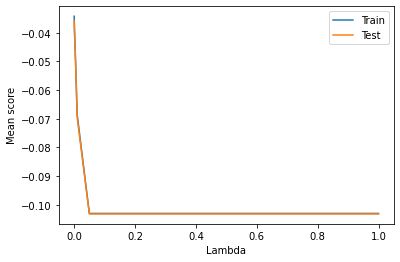

In [249]:
# Plot

plt_data_train = [[params['alpha'][r], mean_train_score[r], 'Train'] for r in range(len(params['alpha']))]
plt_data_test = [[params['alpha'][r], mean_test_score[r], 'Test'] for r in range(len(params['alpha']))]

plt_data_train = pd.DataFrame(plt_data_train,columns=['Lambda','Value','Data'])
plt_data_test = pd.DataFrame(plt_data_test,columns=['Lambda','Value','Data'])

plt_data = pd.concat([plt_data_train, plt_data_test])

ax = sns.lineplot(x=plt_data['Lambda'], y=plt_data['Value'], hue=plt_data['Data'])
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean score')
plt.show()

In [250]:
# The best hyperparameter alpha

print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


The Lasso regression best optimal value for alpha is given as {'alpha': 0.0001}

In [251]:
# list of alphas to test in Grid Search
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()


In [252]:
# cross validation using GridSearchCV
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [253]:
## The results are saved in a dataframe
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.014785      0.000747         0.003794        0.000398       1e-05   
1       0.010800      0.001601         0.003998        0.001097      0.0001   
2       0.008396      0.000802         0.004995        0.000634       0.001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.031381          -0.035338          -0.040334   
1  {'alpha': 0.0001}          -0.032026          -0.034909          -0.041553   
2   {'alpha': 0.001}          -0.036980          -0.035983          -0.045406   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.035546  ...        -0.035558        0.002844                1   
1          -0.035215  ...        -0.035818        0.003119                2   
2          -0.037058  ...        -0.039189        0.003468                3   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.034772           -0.033228           -0.032930   
1           -0.035145           -0.033858           -0.033373   
2           -0.039091           -0.038152           -0.037250   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.033887           -0.033742         -0.033712         0.000632  
1           -0.034450           -0.034205         -0.034206         0.000593  
2           -0.038859           -0.037925         -0.038255         0.000662  

[3 rows x 21 columns]

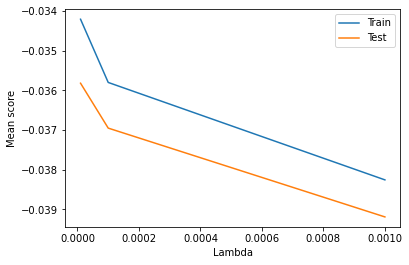

In [254]:
# Plot
plt_data_train = [[params['alpha'][r], mean_train_score[r], 'Train'] for r in range(len(params['alpha']))]
plt_data_test = [[params['alpha'][r], mean_test_score[r], 'Test'] for r in range(len(params['alpha']))]

plt_data_train = pd.DataFrame(plt_data_train,columns=['Lambda','Value','Data'])
plt_data_test = pd.DataFrame(plt_data_test,columns=['Lambda','Value','Data'])

plt_data = pd.concat([plt_data_train, plt_data_test])

ax = sns.lineplot(x=plt_data['Lambda'], y=plt_data['Value'], hue=plt_data['Data'])
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean score')
plt.show()

Observing from the datapoints the value is somewhere between 0 and 0.0002

In [255]:
# Checking the best parameter(Alpha value)
model_cv_lasso.best_params_

{'alpha': 1e-05}

The Best parameter is found at the alpha {'alpha': 0.00001}

In [256]:
# Fitting Lasso model for alpha which is taken now
Lassoalpha = model_cv_lasso.best_params_['alpha']
lasso = Lasso(alpha=Lassoalpha)
# Lasso fit done
lasso.fit(X_train_lasso, y_train)
print(lasso.coef_)

[-0.          0.11413885  0.25544763  0.06400861  0.26857004  0.02358476
  0.03917838  0.1552302   0.04589953 -0.04227499  0.0148997   0.17672269
  0.15331159  0.15498946  0.10506586  0.03788252  0.03857924  0.05911641
  0.06184992  0.07222948  0.041617   -0.09424682  0.03502581 -0.02279233
 -0.03155569 -0.05464934  0.05426363  0.03998454  0.04726962  0.03420188]


In [257]:
# Metric Evaluation for the Lasso model. Predict in the train test data

y_lassopred_train = lasso.predict(X_train_lasso)
r2_train_lasso = r2_score(y_train, y_lassopred_train)
mse_train_lasso = mean_squared_error(y_train, y_lassopred_train)
print('Train R2 score: ', r2_train_lasso)
print('Train MSE score: ', mse_train_lasso)

Train R2 score:  0.87348249986541
Train MSE score:  0.0022305864788476166


- Train R2 score:  0.87348249986541
- Train MSE score:  0.0022305864788476166

In [258]:
#Residual Sum of Squares 
rss_train_lasso = np.sum(np.square(y_train - y_lassopred_train))
print("RSS is :",rss_train_lasso)
mse_train_lasso = mean_squared_error(y_train, y_lassopred_train)
print("MSE is : ",mse_train_lasso)
# Root Mean Squared Error
rmse_train_lasso = mse_train_lasso**0.5
print("RMSE is : ",rmse_train_lasso)


RSS is : 2.279659381382264
MSE is :  0.0022305864788476166
RMSE is :  0.047229085094331616


In [259]:
y_lassopred_test = lasso.predict(X_test_lasso)
r2_test_lasso = r2_score(y_test, y_lassopred_test)
mse_test_lasso = mean_squared_error(y_test, y_lassopred_test)
print('Test R2 score: ', r2_test_lasso)
print('Test MSE score: ', mse_test_lasso)

Test R2 score:  0.8410864432834301
Test MSE score:  0.0023987270788673413


- Test R2 score:  0.8410864432834301
- Test MSE score:  0.0023987270788673413

In [260]:
#Residual Sum of Squares
rss_test_lasso = np.sum(np.square(y_test - y_lassopred_test))
print("RSS is :",rss_test_lasso)
mse_test_lasso = mean_squared_error(y_test, y_lassopred_test)
print("MSE is : ",mse_test_lasso)
# Root Mean Squared Error
rmse_test_lasso = mse_test_lasso**0.5
print("RMSE is : ",rmse_test_lasso)

RSS is : 1.0506424605438955
MSE is :  0.0023987270788673413
RMSE is :  0.048976801435652584


In [261]:
result_df.loc[4] = ['Lasso',r2_train_lasso, rss_train_lasso,  mse_train_lasso, rmse_train_lasso, 'Train']
result_df.loc[5] = ['Lasso',r2_test_lasso, rss_test_lasso, mse_test_lasso, rmse_test_lasso, 'Test']
result_df

Model        R2       RSS       MSE      RMSE   Type
0  Vanila  0.768509  4.171130  0.004081  0.063885  Train
1  Vanila  0.696067  2.009424  0.004588  0.067733   Test
2   Ridge  0.873480  2.279709  0.002231  0.047230  Train
3   Ridge  0.839998  1.057837  0.002415  0.049144   Test
4   Lasso  0.873482  2.279659  0.002231  0.047229  Train
5   Lasso  0.841086  1.050642  0.002399  0.048977   Test

In [262]:
# Metrics Coparison for Models
result_df.pivot_table(index='Model', columns=['Type'],values=['R2','RSS','MSE','RMSE'])

MSE                  R2                RMSE                 RSS  \
Type        Test     Train      Test     Train      Test     Train      Test   
Model                                                                          
Lasso   0.002399  0.002231  0.841086  0.873482  0.048977  0.047229  1.050642   
Ridge   0.002415  0.002231  0.839998  0.873480  0.049144  0.047230  1.057837   
Vanila  0.004588  0.004081  0.696067  0.768509  0.067733  0.063885  2.009424   

                  
Type       Train  
Model             
Lasso   2.279659  
Ridge   2.279709  
Vanila  4.171130

#### From the 3 regression model followed, Lasso regression has the best value for the Test and Train result having Train as 0.873482 and Test as 0.841086

We can see that Ridge and Lasso are close but still Lasso is having near value for Train and Test compared to Ridge

### Lets observe the changes in the coefficients after regularization

In [263]:
betas = pd.DataFrame(index=X_train.columns)

In [264]:
betas.rows = X_train_new.columns

In [265]:
ridge.coef_


array([-0.00033267,  0.11393548,  0.25386498,  0.06426303,  0.26464154,
        0.02549269,  0.03977126,  0.15553249,  0.04621941, -0.04241176,
        0.01536336,  0.1733505 ,  0.14990948,  0.15173074,  0.1019665 ,
        0.03823372,  0.03908881,  0.06016657,  0.06221   ,  0.0726995 ,
        0.04256467, -0.09431306,  0.03525169, -0.03085258, -0.03760763,
       -0.05506795,  0.05685558,  0.04277668,  0.0501475 ,  0.036806  ])

In [266]:
lasso.coef_

array([-0.        ,  0.11413885,  0.25544763,  0.06400861,  0.26857004,
        0.02358476,  0.03917838,  0.1552302 ,  0.04589953, -0.04227499,
        0.0148997 ,  0.17672269,  0.15331159,  0.15498946,  0.10506586,
        0.03788252,  0.03857924,  0.05911641,  0.06184992,  0.07222948,
        0.041617  , -0.09424682,  0.03502581, -0.02279233, -0.03155569,
       -0.05464934,  0.05426363,  0.03998454,  0.04726962,  0.03420188])

In [267]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [268]:
pd.set_option('display.max_rows', None)
betas.head(30)

Ridge     Lasso
LotFrontage                           -0.000333 -0.000000
LotArea                                0.113935  0.114139
OverallQual                            0.253865  0.255448
OverallCond                            0.064263  0.064009
GrLivArea                              0.264642  0.268570
FullBath                               0.025493  0.023585
Fireplaces                             0.039771  0.039178
GarageCars                             0.155532  0.155230
WoodDeckSF                             0.046219  0.045900
HouseAge                              -0.042412 -0.042275
MSSubClass_SPLIT FOYER                 0.015363  0.014900
MSZoning_Floating Village Residential  0.173351  0.176723
MSZoning_Residential High Density      0.149909  0.153312
MSZoning_Residential Low Density       0.151731  0.154989
MSZoning_Residential Medium Density    0.101967  0.105066
Neighborhood_ClearCr                   0.038234  0.037883
Neighborhood_Crawfor                   0.039089  0.038579
Neighborhood_NoRidge                   0.060167  0.059116
Neighborhood_NridgHt                   0.062210  0.061850
Neighborhood_StoneBr                   0.072700  0.072229
Neighborhood_Veenker                   0.042565  0.041617
Exterior1st_BrkComm                   -0.094313 -0.094247
Exterior1st_BrkFace                    0.035252  0.035026
Exterior1st_ImStucc                   -0.030853 -0.022792
Foundation_Stone                      -0.037608 -0.031556
BsmtQual_NA                           -0.055068 -0.054649
GarageType_Attchd                      0.056856  0.054264
GarageType_Basment                     0.042777  0.039985
GarageType_BuiltIn                     0.050148  0.047270
GarageType_Detchd                      0.036806  0.034202

In [269]:
model_param_ridge = list(ridge.coef_)
model_param_ridge.insert(0,ridge.intercept_)
cols = X_test_ridge.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param_ridge,(abs(ele) for ele in model_param_ridge))))
ridge_coef.columns = ['Feature','Coef','Mod']
ridge_coef

Feature      Coef       Mod
0                             LotFrontage -0.017320  0.017320
1                                 LotArea -0.000333  0.000333
2                             OverallQual  0.113935  0.113935
3                             OverallCond  0.253865  0.253865
4                               GrLivArea  0.064263  0.064263
5                                FullBath  0.264642  0.264642
6                              Fireplaces  0.025493  0.025493
7                              GarageCars  0.039771  0.039771
8                              WoodDeckSF  0.155532  0.155532
9                                HouseAge  0.046219  0.046219
10                 MSSubClass_SPLIT FOYER -0.042412  0.042412
11  MSZoning_Floating Village Residential  0.015363  0.015363
12      MSZoning_Residential High Density  0.173351  0.173351
13       MSZoning_Residential Low Density  0.149909  0.149909
14    MSZoning_Residential Medium Density  0.151731  0.151731
15                   Neighborhood_ClearCr  0.101967  0.101967
16                   Neighborhood_Crawfor  0.038234  0.038234
17                   Neighborhood_NoRidge  0.039089  0.039089
18                   Neighborhood_NridgHt  0.060167  0.060167
19                   Neighborhood_StoneBr  0.062210  0.062210
20                   Neighborhood_Veenker  0.072700  0.072700
21                    Exterior1st_BrkComm  0.042565  0.042565
22                    Exterior1st_BrkFace -0.094313  0.094313
23                    Exterior1st_ImStucc  0.035252  0.035252
24                       Foundation_Stone -0.030853  0.030853
25                            BsmtQual_NA -0.037608  0.037608
26                      GarageType_Attchd -0.055068  0.055068
27                     GarageType_Basment  0.056856  0.056856
28                     GarageType_BuiltIn  0.042777  0.042777
29                      GarageType_Detchd  0.050148  0.050148

In [270]:
#selecting the top 5 variables
ridge_coef.sort_values(by='Mod',ascending=False).head()

Feature      Coef       Mod
5                              FullBath  0.264642  0.264642
3                           OverallCond  0.253865  0.253865
12    MSZoning_Residential High Density  0.173351  0.173351
8                            WoodDeckSF  0.155532  0.155532
14  MSZoning_Residential Medium Density  0.151731  0.151731

In [271]:
model_param_lasso = list(lasso.coef_)
model_param_lasso.insert(0,lasso.intercept_)
cols = X_test_lasso.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param_lasso,(abs(ele) for ele in model_param_lasso))))
lasso_coef.columns = ['Feature','Coef','Mod']
lasso_coef

Feature      Coef       Mod
0                             LotFrontage -0.018340  0.018340
1                                 LotArea -0.000000  0.000000
2                             OverallQual  0.114139  0.114139
3                             OverallCond  0.255448  0.255448
4                               GrLivArea  0.064009  0.064009
5                                FullBath  0.268570  0.268570
6                              Fireplaces  0.023585  0.023585
7                              GarageCars  0.039178  0.039178
8                              WoodDeckSF  0.155230  0.155230
9                                HouseAge  0.045900  0.045900
10                 MSSubClass_SPLIT FOYER -0.042275  0.042275
11  MSZoning_Floating Village Residential  0.014900  0.014900
12      MSZoning_Residential High Density  0.176723  0.176723
13       MSZoning_Residential Low Density  0.153312  0.153312
14    MSZoning_Residential Medium Density  0.154989  0.154989
15                   Neighborhood_ClearCr  0.105066  0.105066
16                   Neighborhood_Crawfor  0.037883  0.037883
17                   Neighborhood_NoRidge  0.038579  0.038579
18                   Neighborhood_NridgHt  0.059116  0.059116
19                   Neighborhood_StoneBr  0.061850  0.061850
20                   Neighborhood_Veenker  0.072229  0.072229
21                    Exterior1st_BrkComm  0.041617  0.041617
22                    Exterior1st_BrkFace -0.094247  0.094247
23                    Exterior1st_ImStucc  0.035026  0.035026
24                       Foundation_Stone -0.022792  0.022792
25                            BsmtQual_NA -0.031556  0.031556
26                      GarageType_Attchd -0.054649  0.054649
27                     GarageType_Basment  0.054264  0.054264
28                     GarageType_BuiltIn  0.039985  0.039985
29                      GarageType_Detchd  0.047270  0.047270

In [272]:
#selecting the top 5 variables
lasso_coef.sort_values(by='Mod',ascending=False).head()

Feature      Coef       Mod
5                              FullBath  0.268570  0.268570
3                           OverallCond  0.255448  0.255448
12    MSZoning_Residential High Density  0.176723  0.176723
8                            WoodDeckSF  0.155230  0.155230
14  MSZoning_Residential Medium Density  0.154989  0.154989

## Subjective Question solving

### Question 1
- What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented? 


In [273]:
print("The Best alpha value for Ridge Regression is : ", Ridgealpha)

The Best alpha value for Ridge Regression is :  0.1


In [274]:
print("The Best alpha value for Lasso Regression is : ", Lassoalpha)

The Best alpha value for Lasso Regression is :  1e-05


### Getting the important predictor in the Lasso model

In [275]:
lasso_coef.sort_values(by='Mod',ascending=False).head()

Feature      Coef       Mod
5                              FullBath  0.268570  0.268570
3                           OverallCond  0.255448  0.255448
12    MSZoning_Residential High Density  0.176723  0.176723
8                            WoodDeckSF  0.155230  0.155230
14  MSZoning_Residential Medium Density  0.154989  0.154989

### The Top5 important predictors in the model are:

In [276]:
#selecting the top 5 variables
lasso_coef.sort_values(by='Mod',ascending=False).head()

Feature      Coef       Mod
5                              FullBath  0.268570  0.268570
3                           OverallCond  0.255448  0.255448
12    MSZoning_Residential High Density  0.176723  0.176723
8                            WoodDeckSF  0.155230  0.155230
14  MSZoning_Residential Medium Density  0.154989  0.154989

In [277]:
lasso.coef_

array([-0.        ,  0.11413885,  0.25544763,  0.06400861,  0.26857004,
        0.02358476,  0.03917838,  0.1552302 ,  0.04589953, -0.04227499,
        0.0148997 ,  0.17672269,  0.15331159,  0.15498946,  0.10506586,
        0.03788252,  0.03857924,  0.05911641,  0.06184992,  0.07222948,
        0.041617  , -0.09424682,  0.03502581, -0.02279233, -0.03155569,
       -0.05464934,  0.05426363,  0.03998454,  0.04726962,  0.03420188])

##### When choosing double the alpha value:

In [278]:
Ridge_Doublealpha = Ridgealpha*2
Lasso_Doublealpha = Lassoalpha*2
print(Ridge_Doublealpha,Lasso_Doublealpha)

0.2 2e-05


In [279]:
# Lets build the initial model with the  alpha as 0.001 and build a Ridge regression model
ridge_mod = Ridge(alpha=Ridge_Doublealpha)
ridge_mod.fit(X_train_ridge,y_train)

y_train_pred_DAlpharidge = ridge_mod.predict(X_train_ridge)
mse_train_DAlpharidge = mean_squared_error(y_train, y_train_pred_DAlpharidge)
r2_train_DAlpharidge = r2_score(y_train,y_train_pred_DAlpharidge)
print("R2 score for Train is: ",r2_score(y_train,y_train_pred_DAlpharidge))

y_test_pred_DAlpharidge = ridge_mod.predict(X_test_ridge)
mse_test_DAlpharidge = mean_squared_error(y_test, y_test_pred_DAlpharidge)
r2_test_DAlpharidge = r2_score(y_test,y_test_pred_DAlpharidge)
print("R2 score for the Test is : ",r2_score(y_test,y_test_pred_DAlpharidge))

print("The MSE value for the Train is : ", mse_train_DAlpharidge)
print("The MSE value for the Test is : ", mse_test_DAlpharidge)

R2 score for Train is:  0.8733335930795022
R2 score for the Test is :  0.8406855941152472
The MSE value for the Train is :  0.0022332118031142315
The MSE value for the Test is :  0.0024047777127725184


In [280]:
#Residual Sum of Squares 
rss_train_DAlpharidge = np.sum(np.square(y_train - y_train_pred_DAlpharidge))
print("RSS is :",rss_train_DAlpharidge)
mse_train_DAlpharidge = mean_squared_error(y_train, y_train_pred_DAlpharidge)
print("MSE is : ",mse_train_DAlpharidge)
# Root Mean Squared Error
rmse_train_DAlpharidge = mse_train_DAlpharidge**0.5
print("RMSE is : ",rmse_train_DAlpharidge)


RSS is : 2.2823424627827444
MSE is :  0.0022332118031142315
RMSE is :  0.04725687043292469


In [281]:
#Residual Sum of Squares
rss_test_DAlpharidge = np.sum(np.square(y_test - y_test_pred_DAlpharidge))
print("RSS is :",rss_test_DAlpharidge)
mse_test_DAlpharidge = mean_squared_error(y_test, y_test_pred_DAlpharidge)
print("MSE is : ",mse_test_DAlpharidge)
# Root Mean Squared Error
rmse_test_DAlpharidge = mse_test_DAlpharidge**0.5
print("RMSE is : ",rmse_test_DAlpharidge)

RSS is : 1.053292638194363
MSE is :  0.0024047777127725184
RMSE is :  0.04903853293862408


In [282]:
result_df.loc[6] = ['DAlphaRidge',r2_train_DAlpharidge, rss_train_DAlpharidge,  mse_train_DAlpharidge, rmse_train_DAlpharidge, 'Train']
result_df.loc[7] = ['DAlphaRidge',r2_test_DAlpharidge, rss_test_DAlpharidge, mse_test_DAlpharidge, rmse_test_DAlpharidge, 'Test']
result_df

Model        R2       RSS       MSE      RMSE   Type
0       Vanila  0.768509  4.171130  0.004081  0.063885  Train
1       Vanila  0.696067  2.009424  0.004588  0.067733   Test
2        Ridge  0.873480  2.279709  0.002231  0.047230  Train
3        Ridge  0.839998  1.057837  0.002415  0.049144   Test
4        Lasso  0.873482  2.279659  0.002231  0.047229  Train
5        Lasso  0.841086  1.050642  0.002399  0.048977   Test
6  DAlphaRidge  0.873334  2.282342  0.002233  0.047257  Train
7  DAlphaRidge  0.840686  1.053293  0.002405  0.049039   Test

##### Lasso Model double value

In [283]:
lasso_mod = Lasso(alpha=Lasso_Doublealpha)
lasso_mod.fit(X_train_lasso,y_train)

y_train_pred_DAlphalasso = lasso_mod.predict(X_train_lasso)
mse_train_DAlphalasso = mean_squared_error(y_train, y_train_pred_DAlphalasso)
r2_train_DAlphaLasso = r2_score(y_train,y_train_pred_DAlphalasso)
print("R2 score for Train is: ",r2_score(y_train,y_train_pred_DAlphalasso))
print("The MSE value for the Train is : ", mse_train_DAlphalasso)

y_test_pred_DAlphalasso = lasso_mod.predict(X_test_lasso)
mse_test_DAlphalasso = mean_squared_error(y_test, y_test_pred_DAlphalasso)
r2_test_DAlphaLasso = r2_score(y_test,y_test_pred_DAlphalasso)
print("R2 score for the Test is : ",r2_score(y_test,y_test_pred_DAlphalasso))
print("The MSE value for the Test is : ", mse_test_DAlphalasso)

R2 score for Train is:  0.8733184702157553
The MSE value for the Train is :  0.0022334784291174275
R2 score for the Test is :  0.8428627959480756
The MSE value for the Test is :  0.0023719138520644006


In [284]:
#Residual Sum of Squares 
rss_train_DAlphalasso = np.sum(np.square(y_train - y_train_pred_DAlphalasso))
print("RSS is :",rss_train_DAlphalasso)
mse_train_DAlphalasso = mean_squared_error(y_train, y_train_pred_DAlphalasso)
print("MSE is : ",mse_train_DAlphalasso)
# Root Mean Squared Error
rmse_train_DAlphalasso = mse_train_DAlphalasso**0.5
print("RMSE is : ",rmse_train_DAlphalasso)


RSS is : 2.282614954558011
MSE is :  0.0022334784291174275
RMSE is :  0.0472596913777209


In [285]:
#Residual Sum of Squares
rss_test_DAlphalasso = np.sum(np.square(y_test - y_test_pred_DAlphalasso))
print("RSS is :",rss_test_DAlphalasso)
mse_test_DAlphalasso = mean_squared_error(y_test, y_test_pred_DAlphalasso)
print("MSE is : ",mse_test_DAlphalasso)
# Root Mean Squared Error
rmse_test_DAlphalasso = mse_test_DAlphalasso**0.5
print("RMSE is : ",rmse_test_DAlphalasso)

RSS is : 1.0388982672042075
MSE is :  0.0023719138520644006
RMSE is :  0.048702298221587045


In [286]:

result_df.loc[8] = ['DAlphaLasso',r2_train_DAlphaLasso, rss_train_DAlphalasso,  mse_train_DAlphalasso, rmse_train_DAlphalasso, 'Train']
result_df.loc[9] = ['DAlphaLasso',r2_test_DAlphaLasso, rss_test_DAlphalasso, mse_test_DAlphalasso, rmse_test_DAlphalasso, 'Test']
result_df

Model        R2       RSS       MSE      RMSE   Type
0       Vanila  0.768509  4.171130  0.004081  0.063885  Train
1       Vanila  0.696067  2.009424  0.004588  0.067733   Test
2        Ridge  0.873480  2.279709  0.002231  0.047230  Train
3        Ridge  0.839998  1.057837  0.002415  0.049144   Test
4        Lasso  0.873482  2.279659  0.002231  0.047229  Train
5        Lasso  0.841086  1.050642  0.002399  0.048977   Test
6  DAlphaRidge  0.873334  2.282342  0.002233  0.047257  Train
7  DAlphaRidge  0.840686  1.053293  0.002405  0.049039   Test
8  DAlphaLasso  0.873318  2.282615  0.002233  0.047260  Train
9  DAlphaLasso  0.842863  1.038898  0.002372  0.048702   Test

In [287]:
# Metrics Coparison for Models
result_df.pivot_table(index='Model', columns=['Type'],values=['R2','RSS','MSE','RMSE'])

MSE                  R2                RMSE            \
Type             Test     Train      Test     Train      Test     Train   
Model                                                                     
DAlphaLasso  0.002372  0.002233  0.842863  0.873318  0.048702  0.047260   
DAlphaRidge  0.002405  0.002233  0.840686  0.873334  0.049039  0.047257   
Lasso        0.002399  0.002231  0.841086  0.873482  0.048977  0.047229   
Ridge        0.002415  0.002231  0.839998  0.873480  0.049144  0.047230   
Vanila       0.004588  0.004081  0.696067  0.768509  0.067733  0.063885   

                  RSS            
Type             Test     Train  
Model                            
DAlphaLasso  1.038898  2.282615  
DAlphaRidge  1.053293  2.282342  
Lasso        1.050642  2.279659  
Ridge        1.057837  2.279709  
Vanila       2.009424  4.171130

##### What will be the most important predictor variables after the change is implemented? 

In [288]:
model_param_DAlpharidge = list(ridge_mod.coef_)
model_param_DAlpharidge.insert(0,ridge_mod.intercept_)
cols = X_test_ridge.columns
cols.insert(0,'const')
ridge_dcoef = pd.DataFrame(list(zip(cols,model_param_DAlpharidge,(abs(ele) for ele in model_param_DAlpharidge))))
ridge_dcoef.columns = ['Feature','Coef','Mod']
ridge_dcoef
#selecting the top 5 variables
ridge_dcoef.sort_values(by='Mod',ascending=False).head()

Feature      Coef       Mod
5                              FullBath  0.259442  0.259442
3                           OverallCond  0.253827  0.253827
12    MSZoning_Residential High Density  0.162515  0.162515
8                            WoodDeckSF  0.154961  0.154961
14  MSZoning_Residential Medium Density  0.141409  0.141409

In [289]:
model_param_DAlphalasso = list(lasso_mod.coef_)
model_param_DAlphalasso.insert(0,lasso_mod.intercept_)
cols = X_test_lasso.columns
cols.insert(0,'const')
lasso_dcoef = pd.DataFrame(list(zip(cols,model_param_DAlphalasso,(abs(ele) for ele in model_param_DAlphalasso))))
lasso_dcoef.columns = ['Feature','Coef','Mod']
lasso_dcoef
#selecting the top 5 variables
lasso_dcoef.sort_values(by='Mod',ascending=False).head()

Feature      Coef       Mod
5                              FullBath  0.267703  0.267703
3                           OverallCond  0.257191  0.257191
12    MSZoning_Residential High Density  0.167208  0.167208
8                            WoodDeckSF  0.154394  0.154394
14  MSZoning_Residential Medium Density  0.146016  0.146016

### Question 3
After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? 

In [290]:
# Dropping the first five important predictors of Lasso model
X_train_lasso = X_train.drop(['FullBath','OverallCond','MSZoning_Residential High Density','WoodDeckSF','MSZoning_Residential Medium Density'],axis=1)
X_test_lasso = X_test.drop(['FullBath','OverallCond','MSZoning_Residential High Density','WoodDeckSF','MSZoning_Residential Medium Density'],axis=1)

X_train_lasso.head()
X_train_lasso.shape

(1022, 25)

In [291]:
X_test_lasso.shape

(438, 25)

In [292]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso_modified, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [293]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007991      0.002278         0.003401        0.000493      0.0001   
1       0.006193      0.000403         0.003599        0.000491       0.001   
2       0.007996      0.001094         0.005067        0.001104        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.033163          -0.034658          -0.042122   
1   {'alpha': 0.001}          -0.037907          -0.035292          -0.046024   
2    {'alpha': 0.01}          -0.064560          -0.062460          -0.074547   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.035825  ...        -0.036505        0.003055                1   
1          -0.037036  ...        -0.039573        0.003829                2   
2          -0.075882  ...        -0.069898        0.005400                3   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.036005           -0.035036           -0.033967   
1           -0.039342           -0.038646           -0.037611   
2           -0.068895           -0.068786           -0.068459   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.035217           -0.034797         -0.035004         0.000658  
1           -0.039067           -0.038290         -0.038591         0.000607  
2           -0.070130           -0.068046         -0.068863         0.000699  

[3 rows x 21 columns]

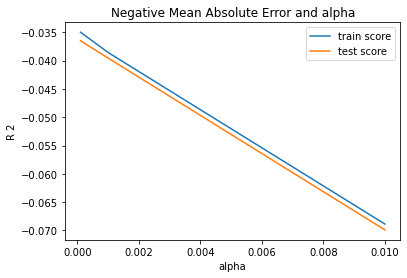

In [294]:
# plotting mean test and train scores with alpha 
lasso_cv_modified_results['param_alpha'] = lasso_cv_modified_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_modified_results['param_alpha'], lasso_cv_modified_results['mean_train_score'])
plt.plot(lasso_cv_modified_results['param_alpha'], lasso_cv_modified_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R 2')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [295]:
# Checking the best parameter(Alpha value)
lasso_cv_model_modified.best_params_
LassoNewalpha = lasso_cv_model_modified.best_params_['alpha']
LassoNewalpha

0.0001

In [296]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=LassoNewalpha)
lasso.fit(X_train_lasso,y_train)

y_train_pred = lasso.predict(X_train_lasso)
y_test_pred = lasso.predict(X_test_lasso)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8603840654492702
Lasso Regression test r2: 0.835208254187731


In [297]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','Mod']
#selecting the top 5 variables
lasso_coef.sort_values(by='Mod',ascending=False).head()

Feature      Coef       Mod
4                             HouseAge  0.285764  0.285764
3                           WoodDeckSF  0.273347  0.273347
0                              LotArea  0.169683  0.169683
6  MSZoning_Residential Medium Density  0.142900  0.142900
2                           GarageCars  0.095674  0.095674